In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 7.6MB/s 
     |████████████████████████████████| 15.4MB 163kB/s 
     |████████████████████████████████| 6.6MB 32.7MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
import requests

# Download and Parse the "basic_info" into useable format 

In [ ]:
basic_into_url = 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fbasic_info_all.json&time=20210515-0000'
basic_into_request = requests.get(basic_into_url)
print(f'Status code: {basic_into_request.status_code}')
if basic_into_request.status_code == 200:
  print('Download Successful!')
  basic_info = pd.json_normalize(json.loads(basic_into_request.content)['car_park'])
else:
  print('Download Failed.')

Status code: 200
Download Successful!


In [ ]:
basic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   park_id            327 non-null    object 
 1   name_en            327 non-null    object 
 2   name_tc            327 non-null    object 
 3   name_sc            327 non-null    object 
 4   displayAddress_en  327 non-null    object 
 5   displayAddress_tc  327 non-null    object 
 6   displayAddress_sc  327 non-null    object 
 7   latitude           327 non-null    float64
 8   longitude          327 non-null    float64
 9   district_en        318 non-null    object 
 10  district_tc        318 non-null    object 
 11  district_sc        318 non-null    object 
 12  contactNo          323 non-null    object 
 13  opening_status     323 non-null    object 
 14  height             327 non-null    float64
 15  remark_en          327 non-null    object 
 16  remark_tc          327 non

In [ ]:
basic_info.describe()

,latitude,longitude,height
count,327.000000,327.000000,327.000000
mean,22.351319,114.151055,0.137003
std,0.065628,0.092594,0.530777
min,22.219482,113.933997,0.000000
25%,22.308235,114.126392,0.000000
50%,22.338652,114.174499,0.000000
75%,22.384872,114.222115,0.000000
max,22.506212,114.274239,3.500000


In [ ]:
basic_info.head(3)

,park_id,name_en,name_tc,name_sc,displayAddress_en,displayAddress_tc,displayAddress_sc,latitude,longitude,district_en,district_tc,district_sc,contactNo,opening_status,height,remark_en,remark_tc,remark_sc,website_en,website_tc,website_sc,carpark_photo
0,tdc1p1,Lee Garden One Car Park,利園一期停車場,利园一期停车场,"33 HYSAN AVENUE, Wan Chai District, Hong Kong",香港 灣仔區 希慎道33號,香港 湾仔区 希慎道33号,22.278598,114.184793,Wan Chai,灣仔區,湾仔区,,open,2.0,Height Limit: \nElectric Vehicle Charging Serv...,高度限制: \n3個電動車充電服務已分別於利園一期停車場B3樓(1個)、利園二期停車場B1樓...,高度限制: \n3个电动车充电服务已分别于利园一期停车场B3楼(1个)、利园二期停车场B1楼...,http://www.leegardens.com.hk/car-park-promotion,http://www.leegardens.com.hk/car-park-promotio...,http://www.leegardens.com.hk/car-park-promotio...,http://resource.data.one.gov.hk/td/carpark/tdc...
1,tdc1p3,Leighton Car Park,禮頓中心停車場,礼顿中心停车场,"77 LEIGHTON ROAD, Wan Chai District, Hong Kong",香港 灣仔區 禮頓道77號,香港 湾仔区 礼顿道77号,22.277768,114.183100,Wan Chai,灣仔區,湾仔区,,open,1.9,Height Limit: \nElectric Vehicle Charging Serv...,高度限制: \n3個電動車充電服務已分別於利園一期停車場B3樓(1個)、利園二期停車場B1樓...,高度限制: \n3个电动车充电服务已分别于利园一期停车场B3楼(1个)、利园二期停车场B1楼...,http://www.leegardens.com.hk/car-park-promotion,http://www.leegardens.com.hk/car-park-promotio...,http://www.leegardens.com.hk/car-park-promotio...,http://resource.data.one.gov.hk/td/carpark/tdc...
2,tdc1p2,Lee Garden Two Car Park,利園二期停車場,利园二期停车场,"28 YUN PING ROAD, Wan Chai District, Hong Kong",香港 灣仔區 恩平道28號,香港 湾仔区 恩平道28号,22.278252,114.185944,Wan Chai,灣仔區,湾仔区,,open,2.1,Height Limit: \nElectric Vehicle Charging Serv...,高度限制: \n3個電動車充電服務已分別於利園一期停車場B3樓(1個)、利園二期停車場B1樓...,高度限制: \n3个电动车充电服务已分别于利园一期停车场B3楼(1个)、利园二期停车场B1楼...,http://www.leegardens.com.hk/car-park-promotion,http://www.leegardens.com.hk/car-park-promotio...,http://www.leegardens.com.hk/car-park-promotio...,http://resource.data.one.gov.hk/td/carpark/tdc...


Columns:

    'website_en', 'website_tc', 'website_sc', 'carpark_photo', 'remark_tc', 'remark_sc', 'opening_status', 'district_tc', 'district_tc', 'district_sc', 'name_en', 'name_tc', 'name_sc', 'displayAddress_en', 'displayAddress_tc', 'displayAddress_sc', 'contactNo'

are either **useless** or contain **repetitive infomation**.
 Hence, they will be removed from the very first beginning.

In [ ]:
basic_info = basic_info.drop(['website_en', 'website_tc', 'website_sc', 'carpark_photo', 'remark_tc', 'remark_sc', 'opening_status', 'district_tc' , 'district_sc', 'name_tc', 'name_sc', 'displayAddress_en', 'displayAddress_tc', 'displayAddress_sc', 'contactNo'], axis=1)

In [ ]:
basic_info.isnull().sum()

park_id        0
name_en        0
latitude       0
longitude      0
district_en    9
height         0
remark_en      0
dtype: int64

Fortunately, there are only one feature contains missing values.
Which can be recovered with the information from http://www.gohk.gov.hk/chi/welcome/index.html

In [ ]:
missing_rows = basic_info.loc[basic_info['district_en'].isnull()]['park_id'].index.tolist()
basic_info.loc[missing_rows, 'district_en'] = ["Yau Tsim Mong",'Southern','Southern','Sham Shui Po','Sha Tin','Sha Tin','Islands','Southern','Sha Tin']

In [ ]:
basic_info.isnull().sum()

park_id        0
name_en        0
latitude       0
longitude      0
district_en    0
height         0
remark_en      0
dtype: int64

In [ ]:
basic_info.nunique()

park_id        327
name_en        326
latitude       327
longitude      326
district_en     18
height           8
remark_en       89
dtype: int64

# CODE FOR DOWNLOADING VANCY DATA

In [ ]:
# define date interval in pandas date range formmat
date_interval = pd.date_range(start="2021/5/1", end="2021/6/1", freq="15T")
converted_date_interval = [date.strftime("%Y%m%d-%H%M") for date in date_interval]

In [ ]:
vacancy_url = "https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fvacancy_all.json&time=" # 20210501-0000
url_list = [vacancy_url + date for date in converted_date_interval]
url_list[:10]

['https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fvacancy_all.json&time=20210501-0000',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fvacancy_all.json&time=20210501-0015',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fvacancy_all.json&time=20210501-0030',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fvacancy_all.json&time=20210501-0045',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fvacancy_all.json&time=20210501-0100',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%2F%2Fresource.data.one.gov.hk%2Ftd%2Fcarpark%2Fvacancy_all.json&time=20210501-0115',
 'https://api.data.gov.hk/v1/historical-archive/get-file?url=https%3A%

In [ ]:
result_df_list = []

for url in url_list:
    d = json.loads(requests.get(url).content) 
    df = pd.json_normalize(d["car_park"])
    result_df_list.append(df)

In [ ]:
len(result_df_list)

2977

In [ ]:
carpark_availability = pd.concat(result_df_list)

In [ ]:
def padding(row):
    pad = [{'type': np.nan,
            'service_category':[
            {'category': np.nan,
            'vacancy_type': np.nan,
            'vacancy': np.nan,
            'lastupdate': np.nan}]}]
    
    if row == []:
        return pad
    
    else:
        return row
    
carpark_availability['vehicle_type'] = carpark_availability['vehicle_type'].apply(padding)

In [ ]:
park_id = carpark_availability['park_id']
vehicle_type = carpark_availability["vehicle_type"].apply(lambda x: x[0]['type'])
category = carpark_availability["vehicle_type"].apply(lambda x: x[0]['service_category'][0]['category'])
vacancy_type = carpark_availability["vehicle_type"].apply(lambda x: x[0]['service_category'][0]['vacancy_type'])
vacancy = carpark_availability["vehicle_type"].apply(lambda x: x[0]['service_category'][0]['vacancy'])
lastupdate = carpark_availability["vehicle_type"].apply(lambda x: x[0]['service_category'][0]['lastupdate'])

In [ ]:
vacancy = pd.DataFrame(np.vstack([park_id, vehicle_type, category, vacancy_type, vacancy, lastupdate]), index=['park_id', 'vehicle_type', 'category', 'vacancy_type', 'vacancy', 'lastupdate'])
vacancy = vacancy.T

In [ ]:
vacancy

,park_id,vehicle_type,category,vacancy_type,vacancy,lastupdate
0,tdc6p10,P,HOURLY,B,0,2020-11-15 15:08:59
1,tdc6p11,P,HOURLY,B,1,2021-04-30 23:00:22
2,tdc6p12,P,HOURLY,B,1,2021-04-30 23:00:31
3,tdc6p8,P,HOURLY,B,1,2021-04-30 23:00:13
4,tdc6p9,P,HOURLY,C,0,2021-04-30 23:06:34
...,...,...,...,...,...,...
973474,tdc65p4,P,HOURLY,B,1,2021-03-30 09:29:22
973475,tdc65p5,P,HOURLY,B,1,2021-03-30 09:29:46
973476,tdc69p1,NaN,NaN,NaN,NaN,NaN
973477,tdc69p2,P,HOURLY,A,16,2021-05-31 23:58:24


In [ ]:
# remove empty and duplicated rows
vacancy.dropna(axis=0, inplace=True)
vacancy.drop_duplicates(inplace=True)

In [ ]:
vacancy.shape

(761050, 6)

In [ ]:
vacancy = vacancy[vacancy['vacancy_type'] == 'A'] 
vacancy = vacancy[vacancy['vehicle_type'] == 'P']

In [ ]:
for i in ['vehicle_type', 'vacancy_type']:
  print(i, vacancy[i].nunique())

vehicle_type 1
vacancy_type 1


In [ ]:
vacancy.drop(['vehicle_type', 'vacancy_type', 'category'], axis=1, inplace=True)

In [ ]:
vacancy.head()

,park_id,vacancy,lastupdate
5,tdc8p3,238,2021-04-30 23:58:05
6,tdcp10,30,2021-04-30 23:59:02
7,tdcp11,150,2021-04-30 23:59:02
8,tdcp12,61,2021-04-30 23:59:02
9,tdcp2,494,2021-04-30 23:59:02


In [ ]:
basic_info = pd.read_csv('/content/basic_info.csv')
vacancy = pd.read_csv('/content/vacancy.csv')

In [ ]:
basic_info_with_vacancy = pd.merge(basic_info, vacancy, on='park_id')

In [ ]:
basic_info_with_vacancy

,park_id,name_en,latitude,longitude,district_en,height,remark_en,vacancy,lastupdate
0,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-04-30 23:57:04
1,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:13:03
2,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:27:03
3,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:41:03
4,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:57:03
...,...,...,...,...,...,...,...,...,...
301956,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15.0,2021-05-31 22:57:27
301957,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15.0,2021-05-31 23:13:29
301958,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15.0,2021-05-31 23:27:28
301959,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15.0,2021-05-31 23:43:29


In [ ]:
basic_info_with_vacancy['Datetime'] = basic_info_with_vacancy['lastupdate'].apply(lambda x: pd.to_datetime(x))

In [ ]:
basic_info_with_vacancy['year'] = basic_info_with_vacancy['Datetime'].dt.year
basic_info_with_vacancy['month'] = basic_info_with_vacancy['Datetime'].dt.month
basic_info_with_vacancy['day'] = basic_info_with_vacancy['Datetime'].dt.day
basic_info_with_vacancy['hour'] = basic_info_with_vacancy['Datetime'].dt.hour
basic_info_with_vacancy['minute'] = basic_info_with_vacancy['Datetime'].dt.minute
basic_info_with_vacancy['day_of_week'] = basic_info_with_vacancy['Datetime'].dt.dayofweek

In [ ]:
basic_info_with_vacancy.head()

,park_id,name_en,latitude,longitude,district_en,height,remark_en,vacancy,lastupdate,Datetime,year,month,day,hour,minute,day_of_week
0,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-04-30 23:57:04,2021-04-30 23:57:04,2021,4,30,23,57,4
1,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:13:03,2021-05-01 00:13:03,2021,5,1,0,13,5
2,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:27:03,2021-05-01 00:27:03,2021,5,1,0,27,5
3,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:41:03,2021-05-01 00:41:03,2021,5,1,0,41,5
4,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137.0,2021-05-01 00:57:03,2021-05-01 00:57:03,2021,5,1,0,57,5


#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


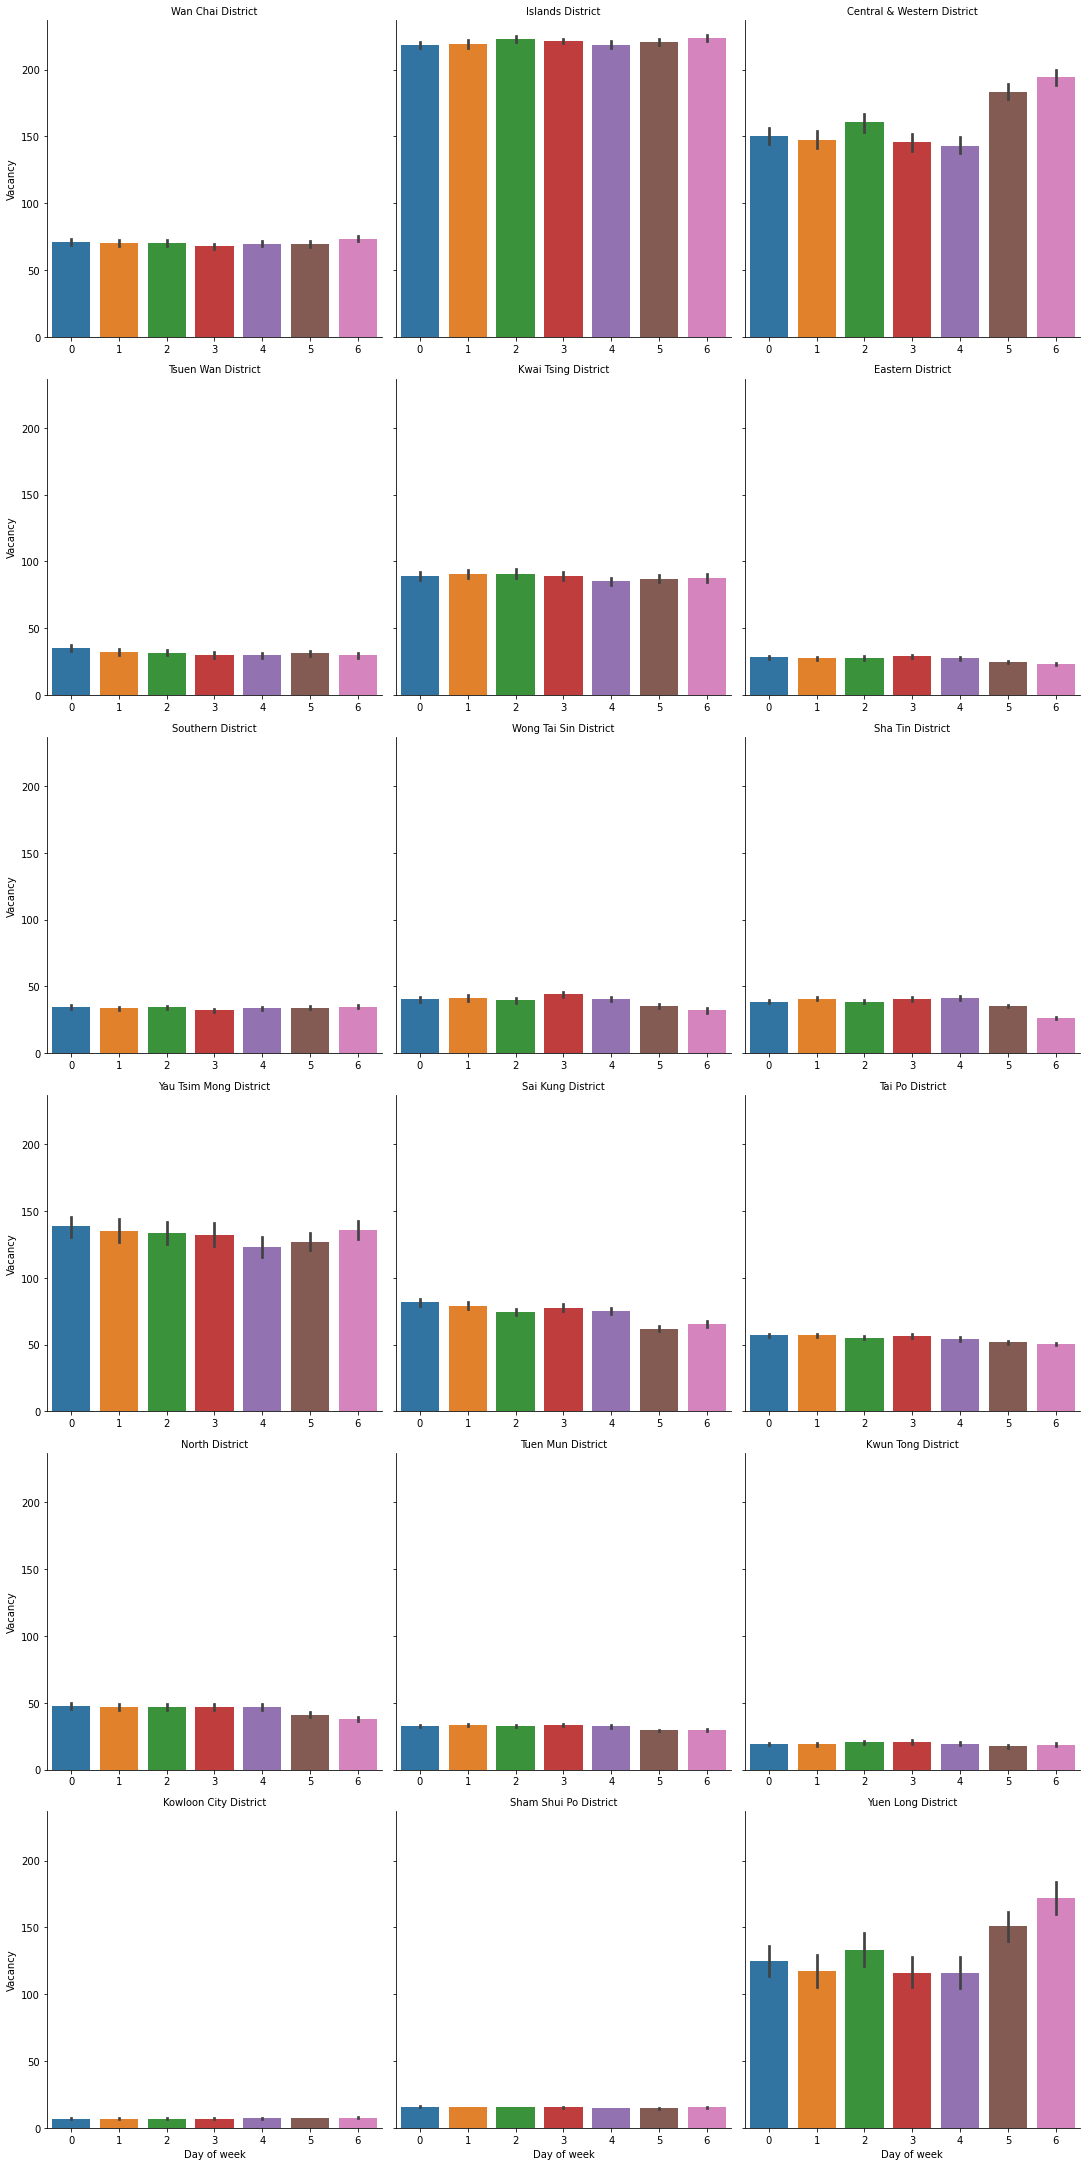

In [ ]:
# week-vacancy by district
ax= sns.catplot(
    data=basic_info_with_vacancy,
    kind='bar',
    col='district_en',
    y='vacancy',
    x='day_of_week',
    col_wrap=3,
    sharex=False,
)
ax.set_axis_labels("Day of week", "Vacancy")
ax.set_titles("{col_name}"+' District')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


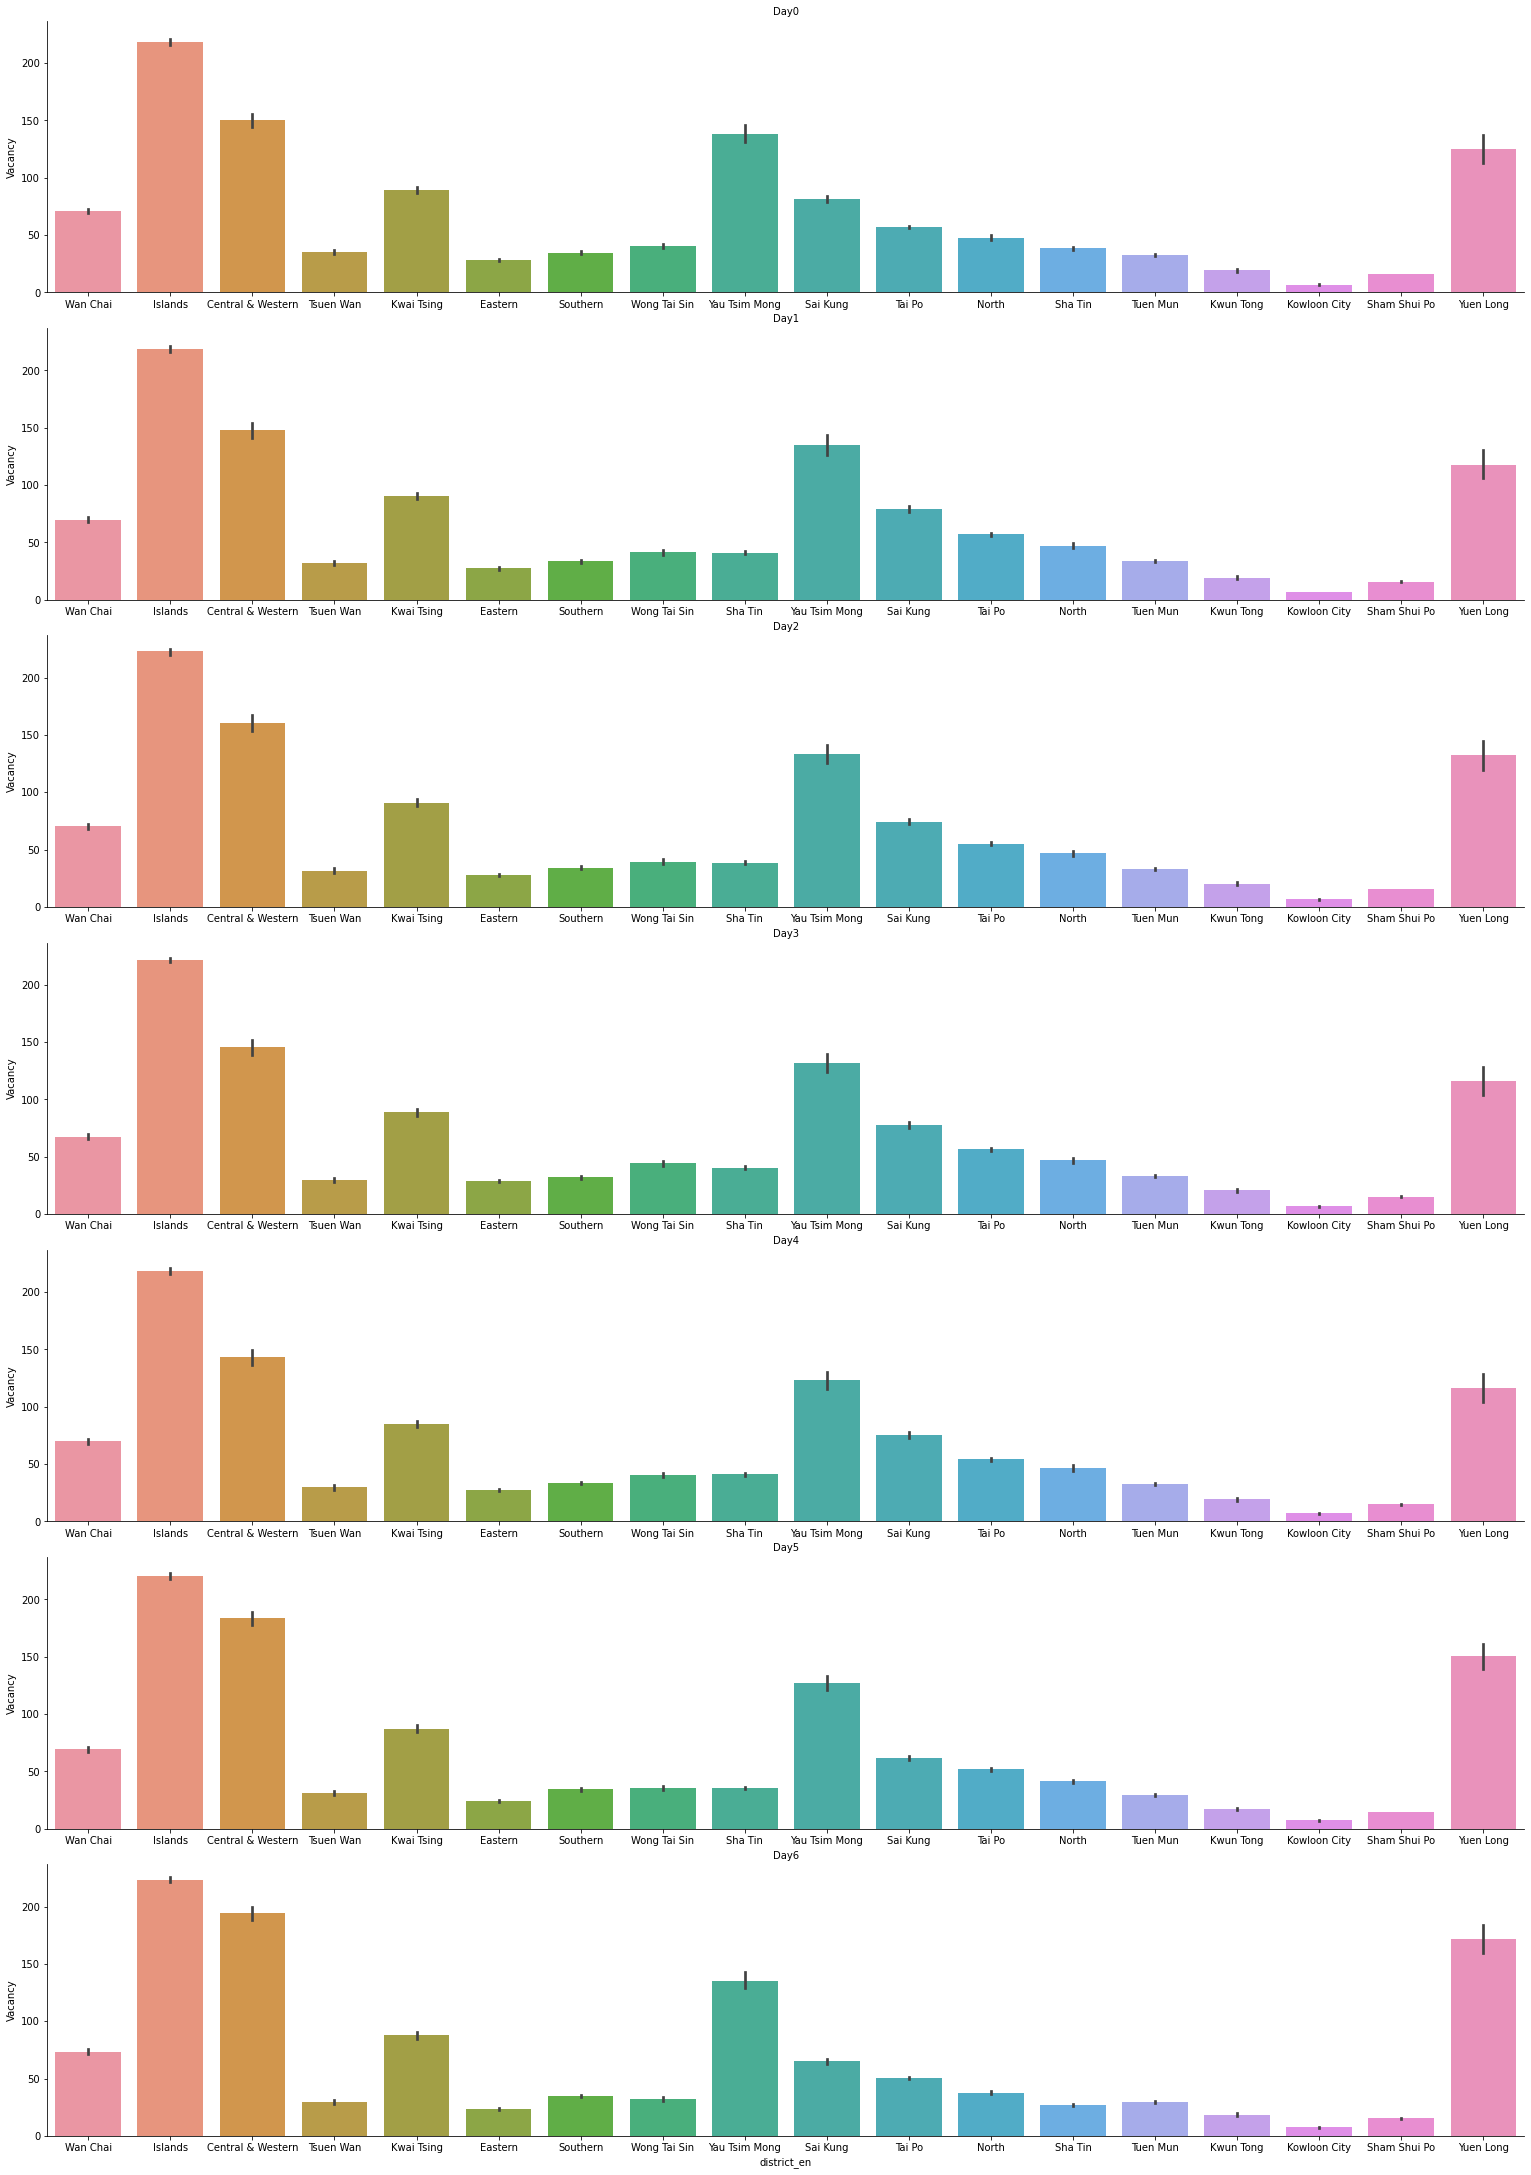

In [ ]:
# Mean Vacancy - District by day (0=Sun, 1=Mon, ..., 6=Sat)
ax=sns.catplot(
    data=basic_info_with_vacancy,
    kind='bar',
    col='day_of_week',
    y='vacancy',
    x='district_en',
    col_wrap=1,
    sharex=False,
)
ax.set_axis_labels("district_en", "Vacancy")
ax.set_titles("Day"+"{col_name}")  
ax.fig.set_size_inches(25,30)

In [ ]:
basic_info_with_vacancy['vacancy'] = basic_info_with_vacancy['vacancy'].astype(int)

In [ ]:
vancancy_district = basic_info_with_vacancy.groupby(['district_en','day_of_week']).mean()['vacancy'].reset_index()
vancancy_district

,district_en,day_of_week,vacancy
0,Central & Western,0,150.025417
1,Central & Western,1,147.539343
2,Central & Western,2,160.602811
3,Central & Western,3,145.467708
4,Central & Western,4,143.102338
...,...,...,...
121,Yuen Long,2,132.841908
122,Yuen Long,3,116.199818
123,Yuen Long,4,116.015109
124,Yuen Long,5,150.813179


In [ ]:
# https://zh-yue.wikipedia.org/wiki/%E9%A6%99%E6%B8%AF%E6%94%BF%E5%8D%80
HKI = ['Central & Western', 'Southern', 'Wan Chai', 'Eastern']
KLN = ['Sham Shui Po', 'Wong Tai Sin', 'Kowloon City', 'Kwun Tong', 'Yau Tsim Mong']
NTW = ['Islands','Tsuen Wan', 'Kwai Tsing', 'Yuen Long', 'Tuen Mun']
NTE = ['Tai Po', 'Sai Kung', 'North', 'Sha Tin']

HK = [HKI, KLN, NTW, NTE]
# 0 = HKI, 1 = KLN, 2=NTW, 3=NTE
basic_info_with_vacancy["zone"] = 0

for i, zone in enumerate(HK):
    for district in zone:
        basic_info_with_vacancy.loc[basic_info_with_vacancy[basic_info_with_vacancy['district_en'].str.contains(district)].index,"zone"] = int(i)

In [ ]:
basic_info_with_vacancy

,park_id,name_en,latitude,longitude,district_en,height,remark_en,vacancy,lastupdate,Datetime,year,month,day,hour,minute,day_of_week,zone
0,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137,2021-04-30 23:57:04,2021-04-30 23:57:04,2021,4,30,23,57,4,0
1,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137,2021-05-01 00:13:03,2021-05-01 00:13:03,2021,5,1,0,13,5,0
2,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137,2021-05-01 00:27:03,2021-05-01 00:27:03,2021,5,1,0,27,5,0
3,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137,2021-05-01 00:41:03,2021-05-01 00:41:03,2021,5,1,0,41,5,0
4,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,Height Limit: \nElectric Vehicle Charging Serv...,137,2021-05-01 00:57:03,2021-05-01 00:57:03,2021,5,1,0,57,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301956,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15,2021-05-31 22:57:27,2021-05-31 22:57:27,2021,5,31,22,57,0,1
301957,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15,2021-05-31 23:13:29,2021-05-31 23:13:29,2021,5,31,23,13,0,1
301958,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15,2021-05-31 23:27:28,2021-05-31 23:27:28,2021,5,31,23,27,0,1
301959,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,Height Limit: 3.5 (Applicable to Private Cars/...,15,2021-05-31 23:43:29,2021-05-31 23:43:29,2021,5,31,23,43,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


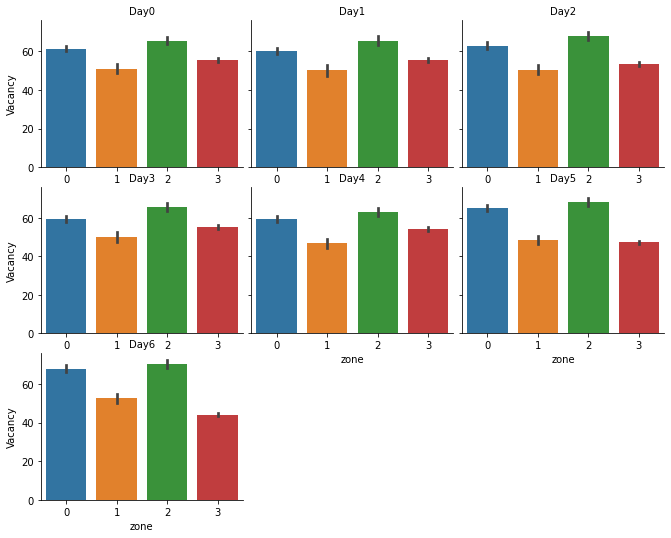

In [ ]:
# Mean Vacancy - Zone by day (0=Sun, 1=Mon, ..., 6=Sat)
ax=sns.catplot(
    data=basic_info_with_vacancy,
    kind='bar',
    col='day_of_week',
    y='vacancy',
    x='zone',
    col_wrap=3,
    sharex=False,
)
ax.set_axis_labels("zone", "Vacancy")
ax.set_titles("Day"+"{col_name}")  
ax.fig.set_size_inches(9,7)

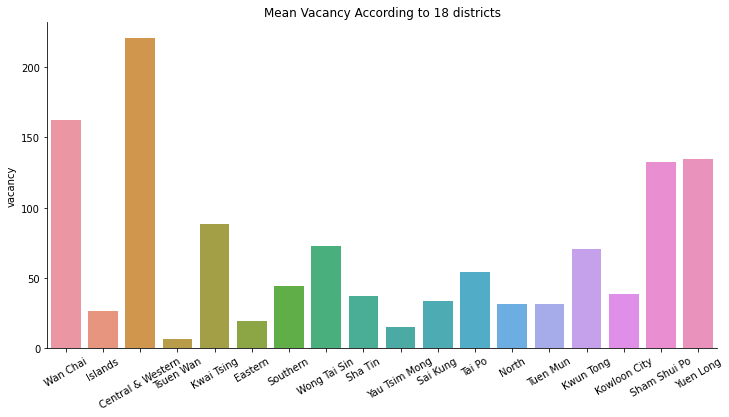

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Mean Vacancy According to 18 districts")
sns.barplot(data=basic_info_with_vacancy.groupby("district_en").mean(),x=basic_info_with_vacancy.district_en.unique(),y="vacancy")
plt.xticks(rotation=30)
sns.despine()
plt.show()

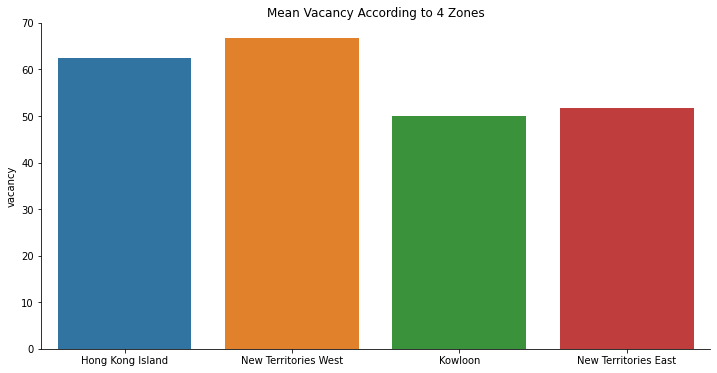

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Mean Vacancy According to 4 Zones")
sns.barplot(data=basic_info_with_vacancy.groupby("zone").mean(),x=basic_info_with_vacancy.zone.unique(),y="vacancy")
plt.xticks(basic_info_with_vacancy.zone.unique(), ["Hong Kong Island", "Kowloon", "New Territories West", "New Territories East"])
sns.despine()
plt.show()

In [ ]:
# Mean Vacancy by Hour by weekend and weekdays
ax=sns.catplot(
    data=df,
    kind='bar',
    col='district_en',
    y='vacancy',
    x='hours',
    hue='weekday',
    col_wrap=3,
    sharex=False,
)
ax.set_axis_labels("Hours", "Vacancy")
ax.set_titles("{col_name}")  
ax.fig.set_size_inches(25,30)

# External Data And Their Sources

Data regarding population were downloaded from http://www.censtatd.gov.hk/en/web_table.html

Data regarding district area were copied from internet

All of them are uploaded to github

In [ ]:
!wget https://raw.githubusercontent.com/HindyDS/DTT-mini---project/main/population_sex.csv
!wget https://raw.githubusercontent.com/HindyDS/DTT-mini---project/main/population2020.csv
!wget https://raw.githubusercontent.com/HindyDS/DTT-mini---project/main/area.xlsx
!wget https://raw.githubusercontent.com/HindyDS/DTT-mini---project/main/basic_info.csv

--2021-06-20 14:34:46--  https://raw.githubusercontent.com/HindyDS/DTT-mini---project/main/population_sex.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9263 (9.0K) [text/plain]
Saving to: ‘population_sex.csv.1’

population_sex.csv. 100%[===================>]   9.05K  --.-KB/s    in 0s      

2021-06-20 14:34:46 (55.9 MB/s) - ‘population_sex.csv.1’ saved [9263/9263]

--2021-06-20 14:34:47--  https://raw.githubusercontent.com/HindyDS/DTT-mini---project/main/population2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 594

In [ ]:
# import the geoJSON file from HKSAR website 
geo_url = 'https://www.had.gov.hk/psi/hong-kong-administrative-boundaries/hksar_18_district_boundary.json'

# We read the file and print it.
district_borders = gpd.read_file(geo_url)
district_borders.head()

,地區號碼,District,地區,Administrative District Boundary of Hong Kong,geometry
0,A,Central & Western,中西區,Administrative District Boundary of Hong Kong,"POLYGON ((114.14951 22.29748, 114.10987 22.297..."
1,B,Wan Chai,灣仔,Administrative District Boundary of Hong Kong,"POLYGON ((114.19771 22.25790, 114.19778 22.258..."
2,C,Eastern,東區,Administrative District Boundary of Hong Kong,"POLYGON ((114.21939 22.29568, 114.21087 22.300..."
3,D,Southern,南區,Administrative District Boundary of Hong Kong,"POLYGON ((114.16338 22.25882, 114.16305 22.258..."
4,E,Yau Tsim Mong,油尖旺,Administrative District Boundary of Hong Kong,"POLYGON ((114.17448 22.32665, 114.17417 22.326..."


In [ ]:
# Next we grab the states and put them in a list and check the length.
# As there 18 districts in total, the length of the list should also 18.
geoJSON_states = list(district_borders.geometry.values)
n_districts = len(geoJSON_states)
print(f'The total number of districts: {n_districts}')

The total number of districts: 18


In [ ]:
# dictionary for us to turn the district code into district name
mapping = {k:v for (k,v) in zip(district_borders['地區號碼'], district_borders[ 'District'])}
mapping

{'A': 'Central & Western',
 'B': 'Wan Chai',
 'C': 'Eastern',
 'D': 'Southern',
 'E': 'Yau Tsim Mong',
 'F': 'Sham Shui Po',
 'G': 'Kowloon City',
 'H': 'Wong Tai Sin',
 'J': 'Kwun Tong',
 'K': 'Tsuen Wan',
 'L': 'Tuen Mun',
 'M': 'Yuen Long',
 'N': 'North',
 'P': 'Tai Po',
 'Q': 'Sai Kung',
 'R': 'Sha Tin',
 'S': 'Kwai Tsing',
 'T': 'Islands'}

In [ ]:
area = pd.read_excel('/content/area.xlsx')
population2020 = pd.read_csv('/content/population2020.csv')
population_sex = pd.read_csv('/content/population_sex.csv')

In [ ]:
# make sure the name of the columns are the same
area.replace({'Central and Western':'Central & Western'}, inplace=True)
area.rename(columns={'Area\n(km2)':'Area (km2)'}, inplace=True)

In [ ]:
population2020.head()

,STAT_VAR,STAT_PRES,CCYY,DC,Sex,Age,OBS_VALUE,SD_VALUE
0,PP,Raw_per_n,2020,A,NaN,NaN,236000,NaN
1,PP,Raw_per_n,2020,B,NaN,NaN,173300,NaN
2,PP,Raw_per_n,2020,C,NaN,NaN,537900,NaN
3,PP,Raw_per_n,2020,D,NaN,NaN,260800,NaN
4,PP,Raw_per_n,2020,E,NaN,NaN,323000,NaN


In [ ]:
# the length of the dataframe is 18
population2020.shape

(18, 8)

In [ ]:
# a sneak peek of the categories of "population2020" dataframe 
for col in population2020.columns:
    print(f'{col}: {population2020[col].unique()}')

STAT_VAR: ['PP']
STAT_PRES: ['Raw_per_n']
CCYY: [2020]
DC: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'J' 'S' 'K' 'L' 'M' 'N' 'P' 'R' 'Q' 'T']
Sex: [nan]
Age: [nan]
OBS_VALUE: [236000 173300 537900 260800 323000 433500 419200 414200 686700 500900
 310000 495000 640600 314500 307900 684800 472800 184700]
SD_VALUE: [nan]


Since columns 'STAT_VAR', 'STAT_PRES', 'CCYY', 'Sex', 'Age' & 'SD_VALUE' only contain one category respectively, they are redundant. 

In [ ]:
# check if there is any missing values
population2020.isnull().sum()

STAT_VAR      0
STAT_PRES     0
CCYY          0
DC            0
Sex          18
Age          18
OBS_VALUE     0
SD_VALUE     18
dtype: int64

In [ ]:
population2020.rename(columns={'OBS_VALUE': 'Population', 'DC':'District'}, inplace=True)
population_sex.rename(columns={'OBS_VALUE': 'Population', 'DC':'District'}, inplace=True)

In [ ]:
population2020.drop(['SD_VALUE', 'STAT_VAR', 'STAT_PRES', 'Sex', 'Age', 'CCYY'], axis=1, inplace=True)
population_sex.drop(['SD_VALUE', 'STAT_VAR', 'STAT_PRES', 'CCYY'], axis=1, inplace=True)

In [ ]:
population2020['District'].replace(mapping, inplace=True)
population_sex['District'].replace(mapping, inplace=True)
population2020['District'].nunique(), population_sex['District'].nunique()

(18, 18)

In [ ]:
population2020.head()

,District,Population
0,Central & Western,236000
1,Wan Chai,173300
2,Eastern,537900
3,Southern,260800
4,Yau Tsim Mong,323000


In [ ]:
area.head()

,District,Area (km2)
0,Central & Western,12.44
1,Eastern,18.56
2,Southern,38.85
3,Wan Chai,9.83
4,Sham Shui Po,9.35


Logically speaking, the availability of parking slots should be correlated to the population of its own district.

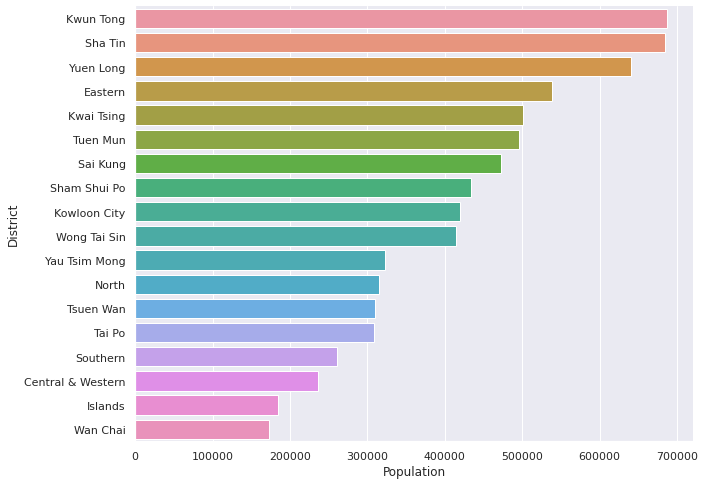

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=population_sex.groupby('District').sum().reset_index().sort_values('Population', ascending=False),
            y='District', 
            x='Population')

sns.despine()

Kwun Tong, Sha Tin, & Yuen Long are the top 3 most populated districts

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


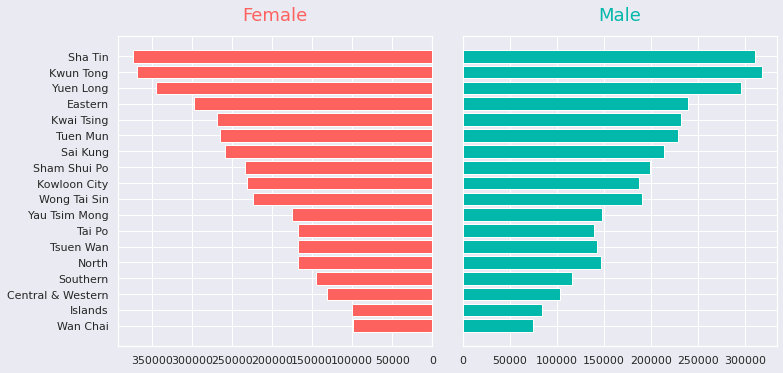

In [ ]:
by_district_sex = population_sex.pivot_table(index='District', columns='Sex', values='Population', aggfunc=sum)
by_district_sex.sort_values('F', ascending=False, inplace=True)

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = by_district_sex.index
column0 = by_district_sex['F']
column1 = by_district_sex['M']
title0 = 'Female'
title1 = 'Male'

fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
        
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()

plt.show()

Considering sex or not, Kwun Tong, Sha Ti, & Yuen Long are the top 3 most populated districts.

In [ ]:
population_sex.head()

,District,Sex,Age,Population
0,Central & Western,M,0 - 14,11500
1,Central & Western,M,15 - 24,10200
2,Central & Western,M,25 - 34,15100
3,Central & Western,M,35 - 44,14000
4,Central & Western,M,45 - 54,14000


In [ ]:
population_sex.groupby(['Sex', 'Age']).sum()

Population
Sex Age                
F   0 - 14       422100
    15 - 24      324700
    25 - 34      576600
    35 - 44      711400
    45 - 54      653400
    55 - 64      639200
    >= 65        691600
M   0 - 14       445400
    15 - 24      331200
    25 - 34      452200
    35 - 44      460700
    45 - 54      479600
    55 - 64      589300
    >= 65        618600

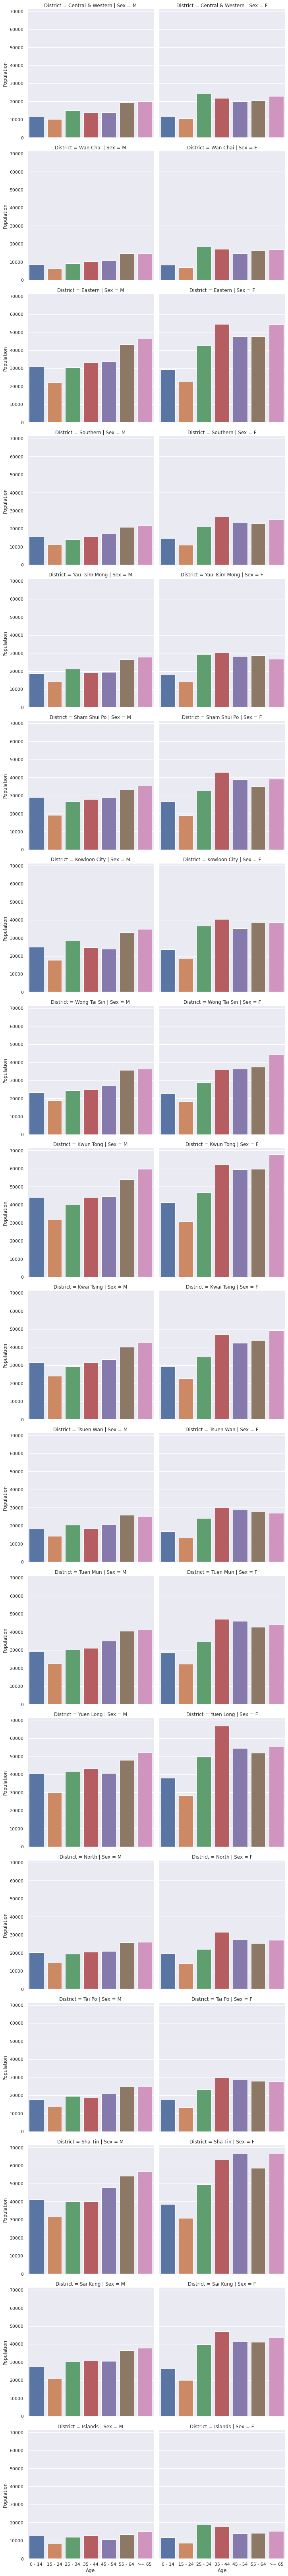

In [ ]:
sns.catplot(data=population_sex, x='Age', y='Population', col='Sex', kind='bar', row='District')
plt.show()

In [ ]:
male = [m for idx, m in enumerate(population_sex.groupby(['District', 'Sex']).sum().reset_index(['District','Sex'])['Population']) if idx%2 == 1]
female = [f for idx, f in enumerate(population_sex.groupby(['District', 'Sex']).sum().reset_index(['District','Sex'])['Population']) if idx%2 == 0]
male_to_female_ratio = np.array(male)/np.array(female)
male_to_female_ratio = pd.DataFrame([male_to_female_ratio], columns=population_sex['District'].unique(), index=['Male to Female Ratio']).T
male_to_female_ratio

,Male to Female Ratio
Central & Western,0.789234
Wan Chai,0.805099
Eastern,0.848849
Southern,0.811582
Yau Tsim Mong,0.865599
Sham Shui Po,0.864204
Kowloon City,0.880981
Wong Tai Sin,0.825097
Kwun Tong,0.833244
Kwai Tsing,0.854942


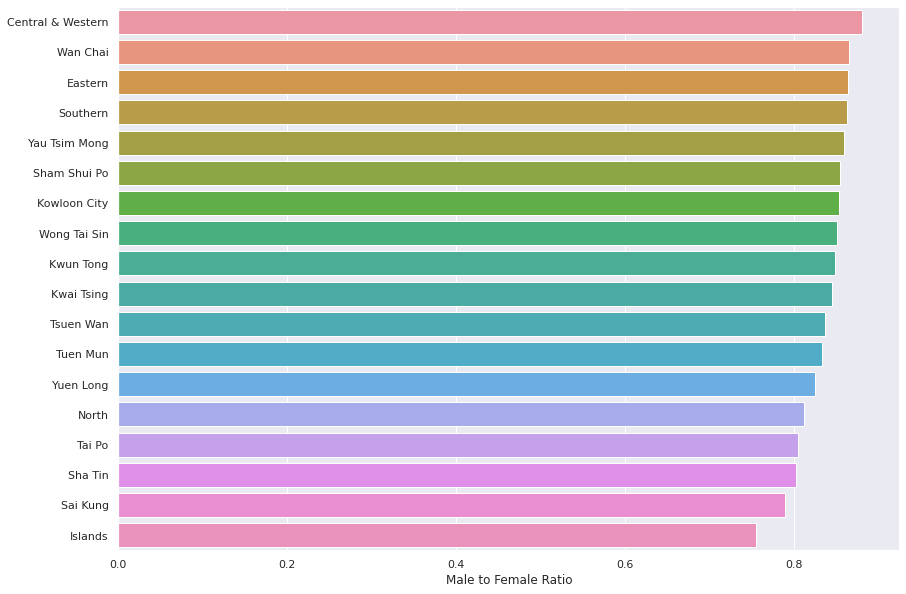

In [ ]:
fig, axes = plt.subplots(figsize=(14,10))
sns.barplot(
    data=male_to_female_ratio.sort_values('Male to Female Ratio',
    ascending=False),
    y=male_to_female_ratio.index,
    x='Male to Female Ratio')

plt.show()

The differences of Male-to-Female Ratio between each district are noticeable but small

# Overlaying the carparks and population on the folium map

Cluster Markers: Carparks (green=low, red = high)

Choropleth Map: Population of each districts (green=low, red = high)

In [ ]:
basic_info.rename(columns={'district_en':'District', 'latitude':'latitude_carpark', 'longitude':'longitude_carpark'}, inplace=True)

In [ ]:
import folium
from folium import Choropleth, Marker, Circle
from folium.plugins import MarkerCluster
import branca.colormap as cmp

In [ ]:
# Choropleth map data
Choro = pd.merge(district_borders, population2020, on='District')

# for district level data
geo_json = json.loads(requests.get(geo_url).text)

In [ ]:
# Create a map
carparks = folium.Map(location=[22.302711, 114.177216], tiles='cartodbpositron', zoom_start=11)


step = cmp.StepColormap(
 ['green','yellow','red'],
 vmin=min(Choro['Population']), 
 vmax=max(Choro['Population']),
 caption='Color Scale for Map'    #Caption for Color scale or Legend
)

# custom cmap for Choropleth map
# display population
folium.GeoJson(
    geo_json,
    style_function=lambda feature: {
        'fillColor': step(Choro.set_index('District')['Population'][feature['properties']['District']]),
        'color': 'black',       #border color for the color fills
        'weight': 1,            #how thick the border has to be
        'dashArray': '5, 3'  #dashed lines length,space between them
    }
).add_to(carparks)

step.add_to(carparks)     #adds colorscale or legend

# add carparks
carparks_location = basic_info[['latitude_carpark', 'longitude_carpark']].values.tolist()
marker_cluster = MarkerCluster().add_to(carparks)
for point in range(0, len(carparks_location)):
    folium.Marker(carparks_location[point],
                  popup=basic_info['name_en'][point],
                  icon=folium.Icon(color='red',icon='car',prefix='fa')).add_to(marker_cluster)

# Display the map
carparks

It seems the Cluster Markers are not our best option to visualizing the distribution of the car parks and population.

We should try using Circle Markers instead.

In [ ]:
# folium circles
carparks2 = folium.Map(location=[22.302711, 114.177216], tiles='cartodbpositron', zoom_start=11)

step = cmp.StepColormap(
 ['green','yellow','red'],
 vmin=min(Choro['Population']), 
 vmax=max(Choro['Population']),
 caption='Color Scale for Map'    #Caption for Color scale or Legend
)

# custom cmap for Choropleth map
# display population
folium.GeoJson(
    geo_json,
    style_function=lambda feature: {
        'fillColor': step(Choro.set_index('District')['Population'][feature['properties']['District']]),
        'color': 'black',       #border color for the color fills
        'weight': 1,            #how thick the border has to be
        'dashArray': '5, 3'  #dashed lines length,space between them
    }
).add_to(carparks2)

step.add_to(carparks2)     #adds colorscale or legend

# Add a bubble map to the base map
for i in range(0,len(carparks_location)):
    Circle(
        location=(carparks_location[i][0], carparks_location[i][1]), 
        radius=20).add_to(carparks2)

# Display the map
carparks2

Much better. It seems Population Density is positively correlated with number of car parks, rather than the area of the districts.


In [ ]:
population2020.sort_values('Population', ascending=False)

,District,Population
8,Kwun Tong,686700
15,Sha Tin,684800
12,Yuen Long,640600
2,Eastern,537900
9,Kwai Tsing,500900
11,Tuen Mun,495000
16,Sai Kung,472800
5,Sham Shui Po,433500
6,Kowloon City,419200
7,Wong Tai Sin,414200


We can see the maximum and minimum of population are 686,700 and 173,300 respectively.



In [ ]:
number_of_carparks = basic_info.groupby('District').count()['park_id'].sort_values(ascending=False)
number_of_carparks

District
Kwun Tong            42
Sha Tin              32
Wong Tai Sin         28
Yuen Long            24
Sai Kung             23
Tuen Mun             22
Eastern              22
Kwai Tsing           18
North                16
Southern             15
Tai Po               14
Islands              14
Sham Shui Po         12
Yau Tsim Mong        11
Wan Chai             11
Tsuen Wan            10
Kowloon City          7
Central & Western     6
Name: park_id, dtype: int64

In [ ]:
area['number of carparks'] = area['District'].replace(number_of_carparks.to_dict())

In [ ]:
area

,District,Area (km2),number of carparks
0,Central & Western,12.44,6
1,Eastern,18.56,22
2,Southern,38.85,15
3,Wan Chai,9.83,11
4,Sham Shui Po,9.35,12
5,Kowloon City,10.02,7
6,Kwun Tong,11.27,42
7,Wong Tai Sin,9.30,28
8,Yau Tsim Mong,6.99,11
9,Islands,175.12,14


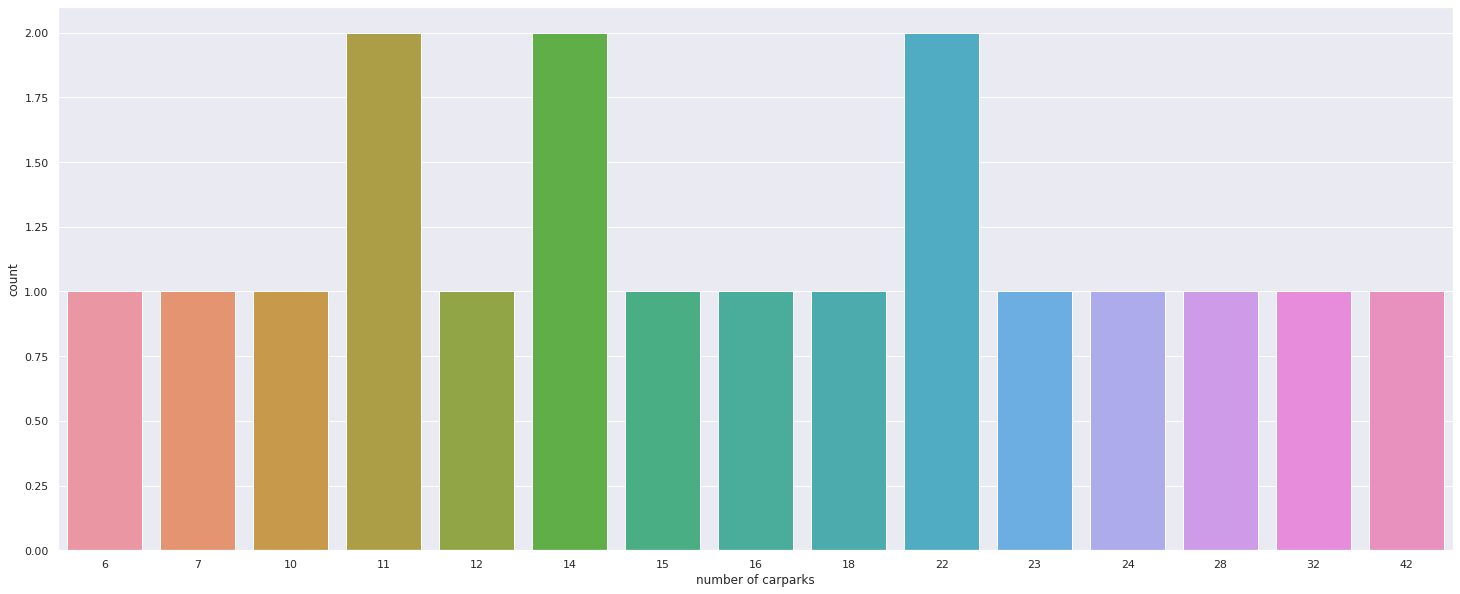

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x="number of carparks", data=area)

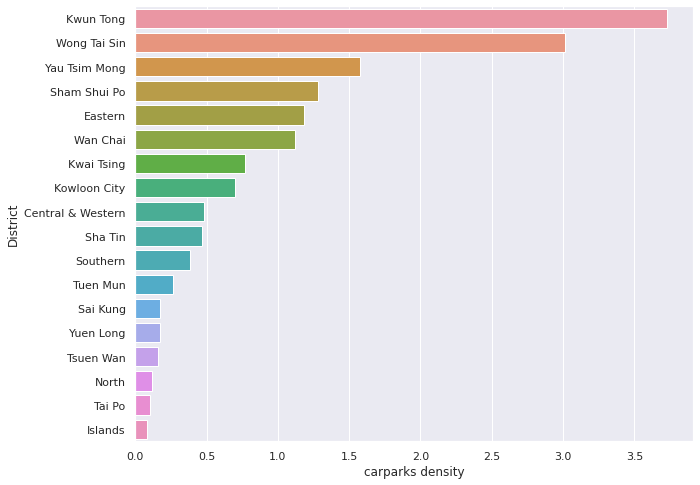

In [ ]:
area['carparks density'] = area['number of carparks'] / area['Area (km2)']
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=area.sort_values('carparks density', ascending=False), y='District', x='carparks density')
plt.show()

Kwun Tong and Wong Tai Sin have relatively higher carparks density, which potentialy means it is easier to get a parking slot in these districts.


# Feature Engineering

In [ ]:
basic_info_with_vacancy.rename(columns={'district_en':'District'}, inplace=True)

In [ ]:
# As only certain carparks provide electrical chargers for electric vehicles,
# certain carparks will be high in demand
def tesla(row):
        return 1 if 'Tesla Superchargers' in row else 0
    
basic_info_with_vacancy['Tesla Superchargers'] = basic_info_with_vacancy['remark_en'].apply(tesla)

In [ ]:
basic_info_with_vacancy.drop(['remark_en'], axis=1, inplace=True)

In [ ]:
basic_info_with_vacancy

,park_id,name_en,latitude,longitude,District,height,vacancy,lastupdate,Datetime,year,month,day,hour,minute,day_of_week,zone,Tesla Superchargers
0,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,137,2021-04-30 23:57:04,2021-04-30 23:57:04,2021,4,30,23,57,4,0,1
1,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,137,2021-05-01 00:13:03,2021-05-01 00:13:03,2021,5,1,0,13,5,0,1
2,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,137,2021-05-01 00:27:03,2021-05-01 00:27:03,2021,5,1,0,27,5,0,1
3,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,137,2021-05-01 00:41:03,2021-05-01 00:41:03,2021,5,1,0,41,5,0,1
4,tdc1p1,Lee Garden One Car Park,22.278598,114.184793,Wan Chai,2.0,137,2021-05-01 00:57:03,2021-05-01 00:57:03,2021,5,1,0,57,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301956,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,15,2021-05-31 22:57:27,2021-05-31 22:57:27,2021,5,31,22,57,0,1,0
301957,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,15,2021-05-31 23:13:29,2021-05-31 23:13:29,2021,5,31,23,13,0,1,0
301958,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,15,2021-05-31 23:27:28,2021-05-31 23:27:28,2021,5,31,23,27,0,1,0
301959,tdc25p44,Hewlett Centre,22.309622,114.224256,Kwun Tong,0.0,15,2021-05-31 23:43:29,2021-05-31 23:43:29,2021,5,31,23,43,0,1,0


In [ ]:
Female = [i for idx, i in enumerate(population_sex[['District', 'Sex', 'Population']].groupby(['District', 'Sex']).sum()['Population']) if idx%2 == 0]
male = [i for idx, i in enumerate(population_sex[['District', 'Sex', 'Population']].groupby(['District', 'Sex']).sum()['Population']) if idx%2 == 1]
ratio = np.array(male)/np.array(Female)
m_to_f_ratio = {k:v for (k, v) in zip(sorted(population_sex['District'].unique()), ratio)}

basic_info_with_vacancy['Male to Female ratio'] = basic_info_with_vacancy['District'].replace(m_to_f_ratio)

In [ ]:
area.rename(columns={'Area\n(km2)':'Area (km2)'}, inplace=True)
area['District'] = area['District'].replace({'Central and Western':'Central & Western'})
area_mapping = area.set_index('District')['Area (km2)'].to_dict()
basic_info_with_vacancy['Area (km2)'] = basic_info_with_vacancy['District'].replace(area_mapping)

In [ ]:
basic_info_with_vacancy['Population'] = basic_info_with_vacancy['District'].replace(population2020.set_index('District')['Population'].to_dict())

In [ ]:
basic_info_with_vacancy['Population Density'] = basic_info_with_vacancy['Population']/basic_info_with_vacancy['Area (km2)']

In [ ]:
def holiday(row):
    if str(row)[:10] == '2021-05-01':
        return 1
    if str(row)[:10] == '2021-05-19':
        return 1
    else:
        return 0
    
basic_info_with_vacancy['holiday'] = basic_info_with_vacancy['Datetime'].apply(holiday)

In [ ]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

basic_info_with_vacancy = encode(basic_info_with_vacancy, 'hour', 23)
basic_info_with_vacancy = encode(basic_info_with_vacancy, 'day_of_week', 6)
basic_info_with_vacancy = encode(basic_info_with_vacancy, 'minute', 45)
basic_info_with_vacancy = encode(basic_info_with_vacancy, 'month', 10)

In [ ]:
# 9-6 office hour
basic_info_with_vacancy['Office Hour'] = np.where((basic_info_with_vacancy['hour'] >= 9) & (basic_info_with_vacancy['hour'] <= 18), 1, 0)

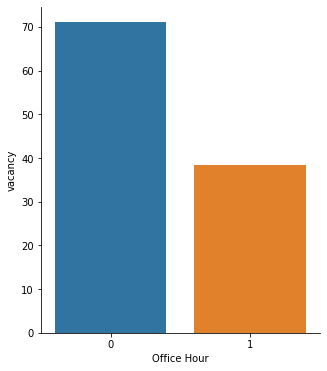

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.barplot(data=basic_info_with_vacancy.groupby('Office Hour')[['vacancy']].mean().reset_index(), y='vacancy', x='Office Hour')
sns.despine()
plt.show()

The mean vacancy in non-office hour is around 70 and in office hour is almost 40, greater by a factor of ~2 
This feature might be useful for our model to predict.


In [ ]:
basic_info_with_vacancy.head(3)

,park_id,latitude,longitude,District,height,vacancy,lastupdate,Datetime,year,month,day,hour,minute,day_of_week,Tesla Superchargers,Area (km2),Male to Female ratio,Population,Population Density,holiday,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,minute_sin,minute_cos,month_sin,month_cos,Office Hour
0,tdc1p1,22.278598,114.184793,Wan Chai,2.0,137,2021-04-30 23:57:04,2021-04-30 23:57:04,2021,4,30,23,57,4,1,9.83,0.754813,173300,17629.704985,0,-2.449294e-16,1.0,-0.866025,-0.5,0.994522,-0.104528,5.877853e-01,-0.809017,0
1,tdc1p1,22.278598,114.184793,Wan Chai,2.0,137,2021-05-01 00:13:03,2021-05-01 00:13:03,2021,5,1,0,13,5,1,9.83,0.754813,173300,17629.704985,1,0.000000e+00,1.0,-0.866025,0.5,0.970296,-0.241922,1.224647e-16,-1.000000,0
2,tdc1p1,22.278598,114.184793,Wan Chai,2.0,137,2021-05-01 00:27:03,2021-05-01 00:27:03,2021,5,1,0,27,5,1,9.83,0.754813,173300,17629.704985,1,0.000000e+00,1.0,-0.866025,0.5,-0.587785,-0.809017,1.224647e-16,-1.000000,0


In [ ]:
number_car_parks_mapping = basic_info_with_vacancy.set_index('District')['park_id'].drop_duplicates().groupby('District').count().to_dict()
basic_info_with_vacancy['Number of Car Parks'] = basic_info_with_vacancy['District'].replace(number_car_parks_mapping)
basic_info_with_vacancy['Car Parks Density'] = basic_info_with_vacancy['Number of Car Parks']/basic_info_with_vacancy['Area (km2)']

In [ ]:
basic_info_with_vacancy['Population to Car Parks Ratio'] = basic_info_with_vacancy['Population']/basic_info_with_vacancy['Number of Car Parks']

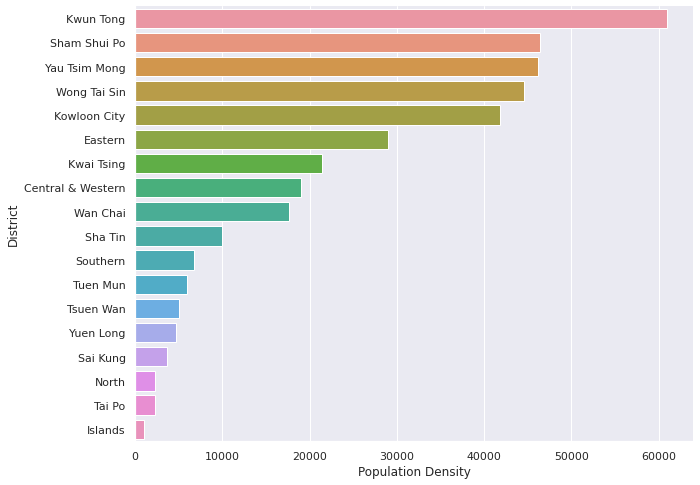

In [ ]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=basic_info_with_vacancy[['District', 'Population Density']].drop_duplicates().sort_values('Population Density', ascending=False),
            y='District',
            x='Population Density')
sns.despine()
plt.show()

The differences of Population Density between each district are significant. 
Which might cause a impact on performance of our model as a potential feature.


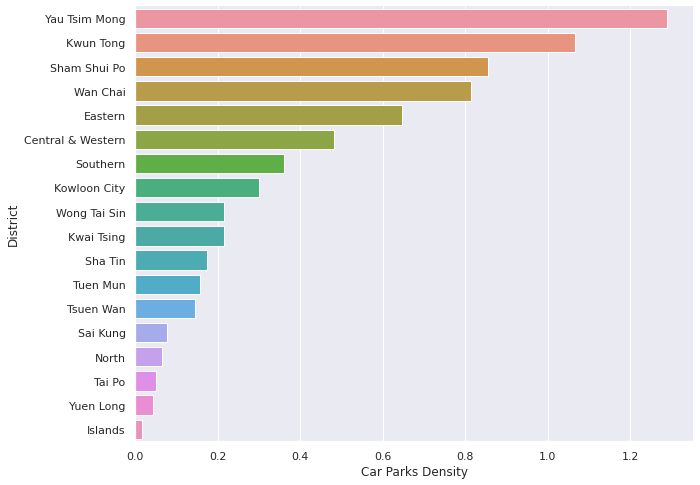

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=basic_info_with_vacancy[['District', 'Car Parks Density']].drop_duplicates().sort_values('Car Parks Density', ascending=False),
            y='District',
            x='Car Parks Density')
sns.despine()
plt.show()

Same as Population Density, the differences of Car Parks Density between each district are significant. 
Which might also cause a impact on prediction performance of our model as a potential feature.


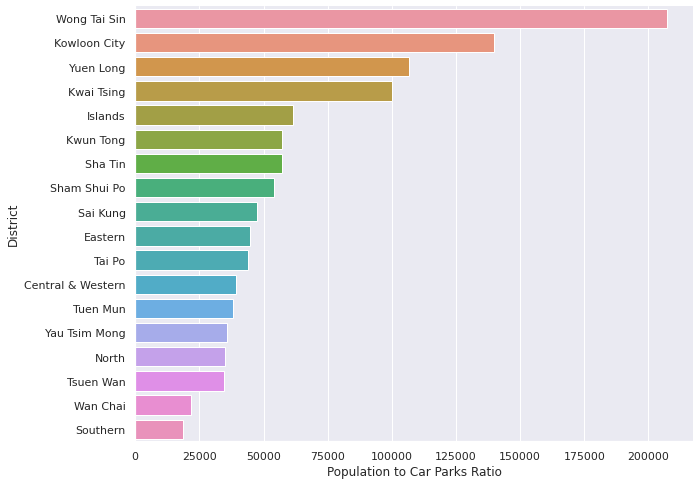

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=basic_info_with_vacancy[['District', 'Population to Car Parks Ratio']].drop_duplicates().sort_values('Population to Car Parks Ratio', ascending=False),
            y='District',
            x='Population to Car Parks Ratio')
sns.despine()
plt.show()

Wong Tai Sin has the highest Population-to-Car Parks Ratio. Kowloon City, Kwai Tsing and Yuen Long roughly shares similar Population-to-Car Parks Ratio

In [ ]:
!pip install DimensionalityReduction

In [ ]:
from DimensionalityReduction import DimensionalityReduction
dr = DimensionalityReduction()

month - month_sin : 0.857 (strong)
Population Density - Car Parks Density : 0.845 (strong)
latitude - zone : 0.836 (strong)
zone - Area (km2) : 0.801 (strong)
Car Parks Density - Area (km2) : 0.774 (strong)
hour_cos - Office Hour : 0.769 (strong)
Area (km2) - Population Density : 0.735 (strong)
hour - hour_sin : 0.729 (strong)
Area (km2) - latitude : 0.719 (strong)
latitude - Male to Female ratio : 0.667 (moderate)
zone - Car Parks Density : 0.637 (moderate)
zone - Male to Female ratio : 0.613 (moderate)
Tesla Superchargers - height : 0.604 (moderate)
Number of Car Parks - Population to Car Parks Ratio : 0.578 (moderate)
Car Parks Density - latitude : 0.559 (moderate)
day_of_week_sin - day_of_week : 0.545 (moderate)
Male to Female ratio - Tesla Superchargers : 0.519 (moderate)
month_cos - month_sin : 0.518 (moderate)
month_cos - year : 0.489 (moderate)
Population - Male to Female ratio : 0.463 (moderate)
zone - Population Density : 0.462 (moderate)
hour_sin - Office Hour : 0.45 (modera

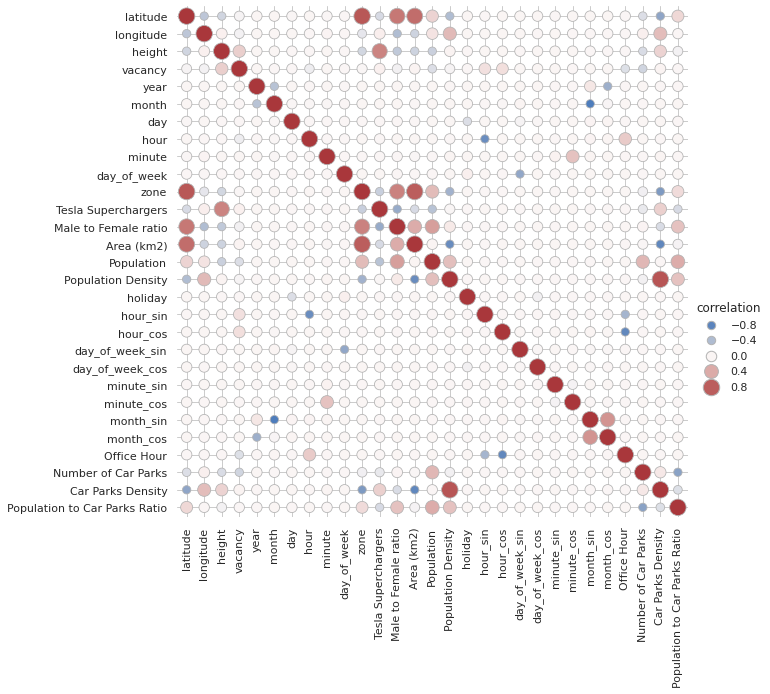

In [ ]:
dr.recognize(basic_info_with_vacancy, 'vacancy', ['park_id', 'name_en'])
dr.pearsons_r()

In [ ]:
dr.pearson_with_target()

vacancy - vacancy : 1.0 (strong)
vacancy - Number of Car Parks : 0.237 (weak)
vacancy - height : 0.22 (weak)
vacancy - Population : 0.18 (weak)
vacancy - Office Hour : 0.176 (weak)
vacancy - hour_cos : 0.142 (weak)
vacancy - hour_sin : 0.139 (weak)
vacancy - hour : 0.096 (weak)
vacancy - Male to Female ratio : 0.075 (weak)
vacancy - longitude : 0.065 (weak)
vacancy - latitude : 0.053 (weak)
vacancy - Population Density : 0.052 (weak)
vacancy - Tesla Superchargers : 0.052 (weak)
vacancy - Car Parks Density : 0.038 (weak)
vacancy - Area (km2) : 0.037 (weak)
vacancy - zone : 0.027 (weak)
vacancy - Population to Car Parks Ratio : 0.011 (weak)
vacancy - day_of_week_sin : 0.007 (weak)
vacancy - day : 0.005 (weak)
vacancy - day_of_week_cos : 0.005 (weak)
vacancy - day_of_week : 0.003 (weak)
vacancy - month : 0.003 (weak)
vacancy - minute : 0.003 (weak)
vacancy - month_sin : 0.003 (weak)
vacancy - year : 0.002 (weak)
vacancy - holiday : 0.002 (weak)
vacancy - minute_cos : 0.001 (weak)
vacancy 

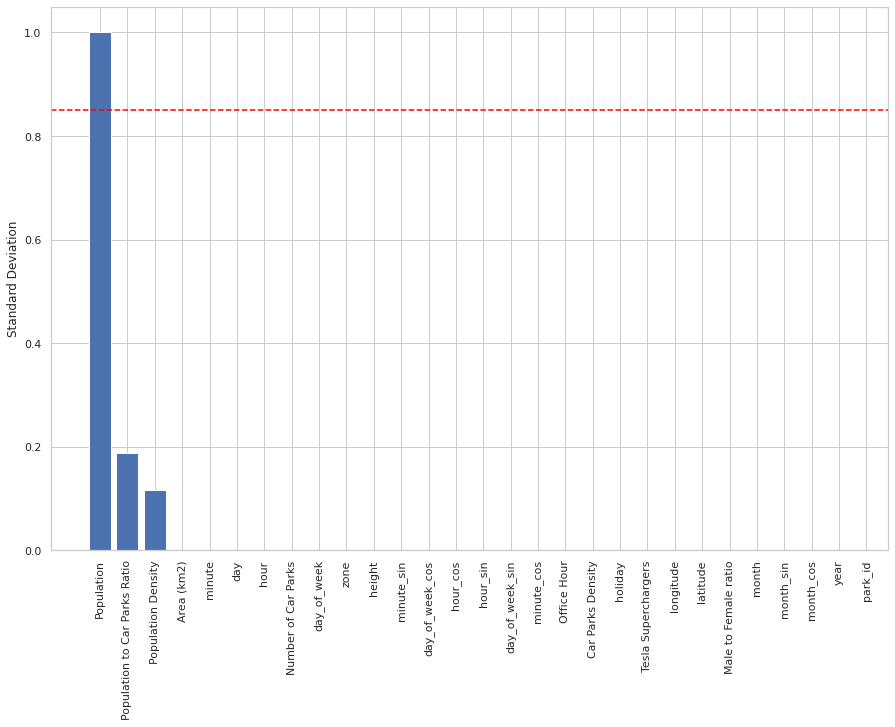

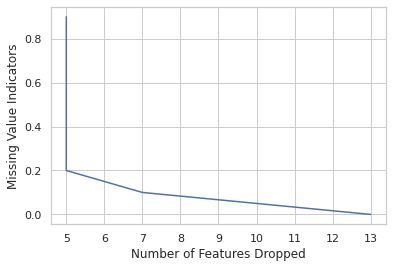

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
dr.std(plot=True)

In [ ]:
dr.reduce()

No features has missing values.


In [ ]:
#basic_info_with_vacancy.to_csv('basic_info_with_vacancy.csv', index=False)

# Label Encoding

In [ ]:
basic_info_with_vacancy = pd.read_csv('/content/basic_info_with_vacancy.csv')

In [ ]:
park_id_mapping = {k:v for (k, v) in zip(basic_info_with_vacancy['park_id'].unique(), range(basic_info_with_vacancy['park_id'].nunique()))}
dc_mapping = {k:v for (k, v) in zip(basic_info_with_vacancy['District'].unique(), range(basic_info_with_vacancy['District'].nunique()))}

In [ ]:
basic_info_with_vacancy['park_id'].replace(park_id_mapping, inplace=True)
basic_info_with_vacancy['District'].replace(dc_mapping, inplace=True)

In [ ]:
selected = ['park_id',	'vacancy',	'day_of_week',	'hour',	'minute',	'Tesla Superchargers',	'Area (km2)',	'District',	'Population',	'Population Density',	'holiday',	'Male to Female ratio',	'zone']

In [ ]:
# define indepent varible and target variable
X = basic_info_with_vacancy[selected].drop(['vacancy'], axis=1)
y = basic_info_with_vacancy['vacancy']

In [ ]:
# splitting the datasets into into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Naive modeling

In [ ]:
for df, name in zip([X_train, X_test, y_train, y_test], ['X_train', 'X_test', 'y_train', 'y_test']):
  print(f'Shape of {name}: {df.shape}')

Shape of X_train: (211372, 12)
Shape of X_test: (90589, 12)
Shape of y_train: (211372,)
Shape of y_test: (90589,)


In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 45kB/s 


In [ ]:
!pip install lightgbm

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()

from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose=0)

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
res = {}
for model, name in zip([xgbr, ada, lgbm, cat, dtr, rfr], ['xgbr', 'ada', 'lgbm', 'cat', 'dtr', 'rfr']):
  score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
  print(f'The Negative MAE of {name}: {score}')
  res[name] = score

[13:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Negative MAE of xgbr: -24.378026207231066
The Negative MAE of ada: -54.4671111986029
The Negative MAE of lgbm: -9.553480862322305


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

The Negative MAE of cat: -6.492824302464504
The Negative MAE of dtr: -4.673644409976458
The Negative MAE of rfr: -4.104649914392192


In [ ]:
nmae = pd.DataFrame(res, index=['neg_mean_absolute_error']).T

In [ ]:
nmae

,neg_mean_absolute_error
xgbr,-24.378026
ada,-54.467111
lgbm,-9.553481
cat,-6.492824
dtr,-4.673644
rfr,-4.104650


In [ ]:
res = {}
for model, name in zip([xgbr, ada, lgbm, cat, dtr, rfr], ['xgbr', 'ada', 'lgbm', 'cat', 'dtr', 'rfr']):
  score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
  print(f'The Negative MSE of {name}: {score}')
  res[name] = score

[13:54:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The Negative MSE of xgbr: -1581.3838578616433
The Negative MSE of ada: -4577.359092288477
The Negative MSE of lgbm: -235.21678230813254
The Negative MSE of cat: -142.1335276045645
The Negative MSE of dtr: -133.61733064004198
The Negative MSE of rfr: -94.1018590234781


In [ ]:
nmse = pd.DataFrame(res, index=['neg_mean_squared_error']).T

In [ ]:
nmse

,neg_mean_squared_error
xgbr,-1581.383858
ada,-4577.359092
lgbm,-235.216782
cat,-142.133528
dtr,-133.617331
rfr,-94.101859


In [ ]:
res = {}
for model, name in zip([xgbr, ada, lgbm, cat, dtr, rfr], ['xgbr', 'ada', 'lgbm', 'cat', 'dtr', 'rfr']):
  score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
  print(f'The R2 of {name}: {score}')
  res[name] = score

[14:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:03:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The R2 of xgbr: 0.8118528623245792
The R2 of ada: 0.4648595231254228
The R2 of lgbm: 0.9720146221454081
The R2 of cat: 0.9830897755553881
The R2 of dtr: 0.9839934143784876
The R2 of rfr: 0.9888349549032476


In [ ]:
r2 = pd.DataFrame(res, index=['r2']).T

In [ ]:
r2

,r2
xgbr,0.811853
ada,0.464860
lgbm,0.972015
cat,0.983090
dtr,0.983993
rfr,0.988835


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
for model, name in zip([xgbr, ada, lgbm, cat, dtr, rfr], ['xgbr', 'ada', 'lgbm', 'cat', 'dtr', 'rfr']):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'MAE of {name}: ', mean_absolute_error(y_test, y_pred))
  print(f'MSE of {name}: ', mean_squared_error(y_test, y_pred))
  print(f'R2 of {name}: ', r2_score(y_test, y_pred))
  print(' ')

[14:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE of xgbr:  22.523880311852423
MSE of xgbr:  1447.0105652518948
R2 of xgbr:  0.826157981206029
 
MAE of ada:  57.74854609447145
MSE of ada:  4991.047914791685
R2 of ada:  0.400381817354744
 
MAE of lgbm:  9.226765180701516
MSE of lgbm:  223.57371949479983
R2 of lgbm:  0.9731401361679158
 
MAE of cat:  6.086052958353468
MSE of cat:  127.6447340259007
R2 of cat:  0.9846649231288652
 
MAE of dtr:  4.5558185872456916
MSE of dtr:  124.17829876021247
R2 of dtr:  0.9850813762765317
 
MAE of rfr:  4.070868942946772
MSE of rfr:  92.33080066857164
R2 of rfr:  0.9889074944091413
 


Random Forest Regressor is the top model here.

In [ ]:
basic_info_with_vacancy_zone_0 = basic_info_with_vacancy[basic_info_with_vacancy['zone'] == 0]
basic_info_with_vacancy_zone_1 = basic_info_with_vacancy[basic_info_with_vacancy['zone'] == 1]
basic_info_with_vacancy_zone_2 = basic_info_with_vacancy[basic_info_with_vacancy['zone'] == 2]
basic_info_with_vacancy_zone_3 = basic_info_with_vacancy[basic_info_with_vacancy['zone'] == 3]

Experimenting with dividing dataset into zones

In [ ]:
for df, z in zip([basic_info_with_vacancy_zone_0, basic_info_with_vacancy_zone_1, basic_info_with_vacancy_zone_2, basic_info_with_vacancy_zone_3], ['Zone_0', 'Zone_1', 'Zone_2', 'Zone_3']):
  X = df[selected].drop(['vacancy'], axis=1)
  y = df['vacancy']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  rf = RandomForestRegressor()
  nmae = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
  nmse = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
  r2 = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2').mean()
  print(f'For {z}')
  print('The neg_mean_absolute_error of RandomForestRegressor: ',nmae)
  print('The neg_mean_absolute_error of RandomForestRegressor: ',nmse)
  print('The neg_mean_absolute_error of RandomForestRegressor: ',r2)
  print(' ')
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  print(f'MAE of RandomForestRegressor: ', mean_absolute_error(y_test, y_pred))
  print(f'MSE of RandomForestRegressor: ', mean_squared_error(y_test, y_pred))
  print(f'R2 of RandomForestRegressor: ', r2_score(y_test, y_pred))
  print(' ')

For Zone_0
The neg_mean_absolute_error of RandomForestRegressor:  -4.2500478220343405
The neg_mean_absolute_error of RandomForestRegressor:  -88.30484287577517
The neg_mean_absolute_error of RandomForestRegressor:  0.9886854997513753
 
MAE of RandomForestRegressor:  4.196003993455621
MSE of RandomForestRegressor:  68.09786729745585
R2 of RandomForestRegressor:  0.991057738013712
 
For Zone_1
The neg_mean_absolute_error of RandomForestRegressor:  -4.458673955301714
The neg_mean_absolute_error of RandomForestRegressor:  -176.92361949114672
The neg_mean_absolute_error of RandomForestRegressor:  0.9880407842487031
 
MAE of RandomForestRegressor:  4.447579538964466
MSE of RandomForestRegressor:  172.43120607180433
R2 of RandomForestRegressor:  0.9883713917430124
 
For Zone_2
The neg_mean_absolute_error of RandomForestRegressor:  -5.000173053879683
The neg_mean_absolute_error of RandomForestRegressor:  -87.95842609178298
The neg_mean_absolute_error of RandomForestRegressor:  0.99110574567625

0:HKI, 1:KL, 2:NTW, 3:NTE

In [ ]:
df = basic_info_with_vacancy.drop(["lastupdate","month","day","longitude","latitude"],axis=1).iloc[:,:-8]

In [ ]:
rev_dc_mapping = {v:k for (k, v) in dc_mapping.items()}
df['District'].replace(rev_dc_mapping, inplace=True)

In [ ]:
# Total Population of 18 dist
TP_districts_dict = dict(df.groupby("District")['Population'].unique().apply(lambda x: int(x[0])))
TP_districts_dict # updated

{'Central & Western': 236000,
 'Eastern': 537900,
 'Islands': 184700,
 'Kowloon City': 419200,
 'Kwai Tsing': 500900,
 'Kwun Tong': 686700,
 'North': 314500,
 'Sai Kung': 472800,
 'Sha Tin': 684800,
 'Sham Shui Po': 433500,
 'Southern': 260800,
 'Tai Po': 307900,
 'Tsuen Wan': 310000,
 'Tuen Mun': 495000,
 'Wan Chai': 173300,
 'Wong Tai Sin': 414200,
 'Yau Tsim Mong': 323000,
 'Yuen Long': 640600}

In [ ]:
# P.D. of 18 dist
PD_districts_dict = dict(df.groupby("District")['Population Density'].unique().apply(lambda x: float(x[0])))
PD_districts_dict # updated

{'Central & Western': 18971.06109324759,
 'Eastern': 28981.68103448276,
 'Islands': 1054.7053449063499,
 'Kowloon City': 41836.327345309386,
 'Kwai Tsing': 21461.011139674378,
 'Kwun Tong': 60931.67701863354,
 'North': 2302.174072176268,
 'Sai Kung': 3646.741226378712,
 'Sha Tin': 9966.525978751275,
 'Sham Shui Po': 46363.63636363637,
 'Southern': 6712.998712998713,
 'Tai Po': 2261.4763128901945,
 'Tsuen Wan': 5023.497002106627,
 'Tuen Mun': 5971.769815418023,
 'Wan Chai': 17629.70498474059,
 'Wong Tai Sin': 44537.63440860215,
 'Yau Tsim Mong': 46208.86981402003,
 'Yuen Long': 4626.606962299581}

In [ ]:
# M2F ratio of 18 dist
M2F_district_dict = dict(df.groupby("District")['Male to Female ratio'].unique().apply(lambda x: float(x[0])))
M2F_district_dict # updated

{'Central & Western': 0.7892342683851402,
 'Eastern': 0.8050989600805099,
 'Islands': 0.8488488488488488,
 'Kowloon City': 0.8115816767502161,
 'Kwai Tsing': 0.8655994043186895,
 'Kwun Tong': 0.864204236827811,
 'North': 0.8809808612440191,
 'Sai Kung': 0.8250965250965251,
 'Sha Tin': 0.8332441113490364,
 'Sham Shui Po': 0.8549422336328626,
 'Southern': 0.8023496890117484,
 'Tai Po': 0.8365155131264916,
 'Tsuen Wan': 0.8507462686567164,
 'Tuen Mun': 0.8633797515995484,
 'Wan Chai': 0.7548125633232016,
 'Wong Tai Sin': 0.8536912751677852,
 'Yau Tsim Mong': 0.8446601941747572,
 'Yuen Long': 0.859257109692397}

In [ ]:
# areas of 18 dist
area_district_dict = dict(df.groupby("District")['Area (km2)'].unique().apply(lambda x: float(x[0])))
area_district_dict # updated

{'Central & Western': 12.44,
 'Eastern': 18.56,
 'Islands': 175.12,
 'Kowloon City': 10.02,
 'Kwai Tsing': 23.34,
 'Kwun Tong': 11.27,
 'North': 136.61,
 'Sai Kung': 129.65,
 'Sha Tin': 68.71,
 'Sham Shui Po': 9.35,
 'Southern': 38.85,
 'Tai Po': 136.15,
 'Tsuen Wan': 61.71,
 'Tuen Mun': 82.89,
 'Wan Chai': 9.83,
 'Wong Tai Sin': 9.3,
 'Yau Tsim Mong': 6.99,
 'Yuen Long': 138.46}

In [ ]:
# carparks that have tesla superchargers
park_id_tesla_list = list(df[df['Tesla Superchargers'] == 1]['park_id'].unique())
park_id_tesla_list # updated

[0, 1, 2, 24, 30]

In [ ]:
# carparks of each district
district_list = list(df["District"].unique())
district_park_id_list = list(df.groupby("District")["park_id"].unique().apply(lambda x: list(x)))

sorted(district_list)

district_park_id_dict = {}

for i, district in enumerate(district_list):
    district_park_id_dict[district] = district_park_id_list[i]

district_park_id_dict # updated

{'Central & Western': [3, 43, 104],
 'Eastern': [45, 46, 48, 63, 64, 69, 70, 71, 115, 131, 136, 147],
 'Islands': [10, 20, 38, 44, 60, 61, 88, 89, 90, 98, 125, 143],
 'Kowloon City': [13, 108],
 'Kwai Tsing': [7, 15, 18, 26, 62],
 'Kwun Tong': [0, 1, 2, 12, 24, 30, 47, 49],
 'North': [5, 28, 33, 67, 81, 84, 87, 127, 129],
 'Sai Kung': [11, 22, 39, 40, 41, 42, 66, 75, 76, 79, 80, 86, 122, 130],
 'Sha Tin': [14, 35, 73, 83, 91, 95, 97, 105, 118, 140, 141, 142],
 'Sham Shui Po': [16, 21, 29, 31, 32, 36, 59, 103, 114],
 'Southern': [27, 57, 96, 107, 117, 132, 133, 134, 135],
 'Tai Po': [25, 52, 56, 58, 93, 94, 106],
 'Tsuen Wan': [51, 85, 138],
 'Tuen Mun': [37, 50, 82, 92, 99, 101, 102, 110, 111, 112, 123, 124, 146],
 'Wan Chai': [4, 6, 8, 9, 17, 34],
 'Wong Tai Sin': [19, 23, 109, 113, 116, 119, 120, 126, 128, 145],
 'Yau Tsim Mong': [53, 54, 55, 65, 74, 77, 137, 139],
 'Yuen Long': [68, 72, 78, 100, 121, 144]}

### Deployment Stage

### Converting into ordinal values (park_id, district_en, Tesla Superchargers, M to F Ratio)

In [ ]:
park_id_list = df["park_id"].unique()
len(park_id_list)

148

In [ ]:
park_id_index_dict={}
for i in range(len(park_id_list)):
    park_id_index_dict[park_id_list[i]] = i 
    
park_id_index_dict

In [ ]:
# IMPORTANT park_id to car park name list
park_id_name_list = dict(basic_info_with_vacancy.groupby("park_id")["name_en"].unique().apply(lambda x: str(x[0])))
park_id_name_list # updated

In [ ]:
import datetime

In [ ]:
input_date = input("Full Date (DD/MM/YYYY):")
input_time = input("Time (HH:MM):")
input_district = input("District:")

# example:
# input_date = "01/05/2021"
# input_time = "23:59"
# input_district= "Kwun Tong"

Full Date (DD/MM/YYYY):01/05/2021
Time (HH:MM):23:59
District:Kwun Tong


In [ ]:
raw = [input_date[:],input_time[:],input_district[:]]

In [ ]:
def up15T(dt):
  #first add 5 minutes to each datetime  (e.g. 2021-04-30 23:58:05 +5 -->2021-05-01 00:03:05)
  dt += datetime.timedelta(minutes=5)
  #second, deduct the new time by the remainder of (new time/15) and seconds (e.g. 00:03:05, 03/15 remainder is 3 --> therefore 2021-05-01 00:03:05 - 00:03:05--> 2021-05-01 00:00:00)
  dt -= datetime.timedelta(minutes=dt.minute % 15, seconds=dt.second)
  return dt

In [ ]:
input_date = input_date.split("/")
input_time = input_time.split(":")

In [ ]:
input_datetime = datetime.datetime(int(input_date[2]),int(input_date[1]),int(input_date[0]),
                                      int(input_time[0]),int(input_time[1]))
input_datetime

datetime.datetime(2021, 5, 1, 23, 59)

In [ ]:
input_day_of_week = up15T(input_datetime).weekday()
input_day_of_week

6

In [ ]:
input_hours = int(str(up15T(input_datetime))[-5:-3])
input_hours

0

In [ ]:
input_minute = int(str(up15T(input_datetime))[-2:])
input_minute

0

In [ ]:
holidays_2021 = [20210101,20210212, 20210213, 20210215, 20210402, 20210403, 20210405, 20210406,
                 20210501, 20210519, 20210614, 20210615, 20210701, 20210922,20201001, 20211014, 20211225, 20211227]

In [ ]:
def is_2021_holiday(input_datetime, holidays_2021):
    input_day = str(up15T(input_datetime).date()).split("-")
    print(input_day)
    if int(input_day[0]+input_day[1]+input_day[2]) in holidays_2021:
        return 1
    return 0

input_holiday = is_2021_holiday(input_datetime, holidays_2021)
input_holiday

['2021', '05', '02']


0

In [ ]:
# input: district
# park_id_list, Area (km2), Total Population, Population Density, Tesla Superchargers, Male to Female Ratio

# output: vacancies according to each car park in the enquired district

In [ ]:
# input zone
for i, zone in enumerate(HK):
    if input_district in zone:
        input_zone = i
        break
input_zone

1

In [ ]:
# carpark id list of the district input
input_park_id_list = district_park_id_dict[input_district]
input_park_id_list

[0, 1, 2, 12, 24, 30, 47, 49]

In [ ]:
# no. of park
input_size = len(input_park_id_list) # updated
input_size

8

In [ ]:
# 1 if carpark has tesla charger else 0
input_tesla_list = []

for id in input_park_id_list:
    if id in park_id_tesla_list:
        input_tesla_list.append(1)
        continue
    input_tesla_list.append(0)

input_tesla_list

[1, 1, 1, 0, 1, 1, 0, 0]

In [ ]:
# verify if input_tesla_list is correct
len(input_park_id_list) == len(input_tesla_list)

True

In [ ]:
input_M2F_list = [float(M2F_district_dict[input_district])]*input_size
input_area_list = [float(area_district_dict[input_district])]*input_size
input_PD_list = [float(PD_districts_dict[input_district])]*input_size
input_TP_list = [float(TP_districts_dict[input_district])]*input_size

In [ ]:
# district to ordinal value
for i, district in enumerate(district_list):
    if input_district == district:
        input_district = i
        print(input_district)

14


In [ ]:
input_TP_list

[686700.0,
 686700.0,
 686700.0,
 686700.0,
 686700.0,
 686700.0,
 686700.0,
 686700.0]

In [ ]:
input_M2F_list

[0.864204236827811,
 0.864204236827811,
 0.864204236827811,
 0.864204236827811,
 0.864204236827811,
 0.864204236827811,
 0.864204236827811,
 0.864204236827811]

In [ ]:
input_area_list

[11.27, 11.27, 11.27, 11.27, 11.27, 11.27, 11.27, 11.27]

In [ ]:
input_PD_list

[60931.67701863354,
 60931.67701863354,
 60931.67701863354,
 60931.67701863354,
 60931.67701863354,
 60931.67701863354,
 60931.67701863354,
 60931.67701863354]

In [ ]:
prediction = {
    "park_id":[park_id_index_dict[park_id] for park_id in input_park_id_list],
    "day_of_week":[input_day_of_week]*input_size,
    "hours":[input_hours]*input_size,
    "minute":[input_minute]*input_size,
    "tesla":input_tesla_list,
    "area":input_area_list,
    "district":[input_district]*input_size,
    "total population":input_TP_list,
    "population density":input_PD_list,
    "holiday":[input_holiday]*input_size,
    "m2f":input_M2F_list,          
    "zone":[input_zone]*input_size
}

In [ ]:
pd.DataFrame(prediction).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   park_id             8 non-null      int64  
 1   day_of_week         8 non-null      int64  
 2   hours               8 non-null      int64  
 3   minute              8 non-null      int64  
 4   tesla               8 non-null      int64  
 5   area                8 non-null      float64
 6   district            8 non-null      int64  
 7   total population    8 non-null      float64
 8   population density  8 non-null      float64
 9   holiday             8 non-null      int64  
 10  m2f                 8 non-null      float64
 11  zone                8 non-null      int64  
dtypes: float64(4), int64(8)
memory usage: 896.0 bytes


In [ ]:
input_prediction = pd.DataFrame(prediction) # updated
input_prediction

,park_id,day_of_week,hours,minute,tesla,area,district,total population,population density,holiday,m2f,zone
0,0,6,0,0,1,11.27,14,686700.0,60931.677019,0,0.864204,1
1,1,6,0,0,1,11.27,14,686700.0,60931.677019,0,0.864204,1
2,2,6,0,0,1,11.27,14,686700.0,60931.677019,0,0.864204,1
3,12,6,0,0,0,11.27,14,686700.0,60931.677019,0,0.864204,1
4,24,6,0,0,1,11.27,14,686700.0,60931.677019,0,0.864204,1
5,30,6,0,0,1,11.27,14,686700.0,60931.677019,0,0.864204,1
6,47,6,0,0,0,11.27,14,686700.0,60931.677019,0,0.864204,1
7,49,6,0,0,0,11.27,14,686700.0,60931.677019,0,0.864204,1


In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
output_pred_vacancy_list = rf.predict(input_prediction)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# raw[0] # date ; raw[1] # time ; raw[2] # district
print(f"Hi There. You are now in {raw[2]} at {raw[1]} on {raw[0]}")
print("Nearby carparks with the corresponding vacancy are listed below:")
print(" ")
for i, park_idx in enumerate(list(input_prediction["park_id"])):
    park_id = park_id_list[park_idx]
    park_name = park_id_name_list[park_id]
    park_pred_vac = output_pred_vacancy_list[i]
    print(f'   - {park_name}: {np.around(park_pred_vac)} spot(s)')

Hi There. You are now in Kwun Tong at 23:59 on 01/05/2021
Nearby carparks with the corresponding vacancy are listed below:
 
   - Lee Garden One Car Park: 325.0 spot(s)
   - Leighton Car Park: 356.0 spot(s)
   - Lee Garden Two Car Park: 314.0 spot(s)
   - Tin Hau Car Park: 117.0 spot(s)
   - Hysan Place Car Park: 49.0 spot(s)
   - Lee Garden Three Car Park: 157.0 spot(s)
   - Wong Nai Chung Gap Children Playground: 31.0 spot(s)
   - Hong Kong Tennis Centre: 32.0 spot(s)


# Complete function

In [ ]:
  # example:
  # input_date = "01/05/2021"
  # input_time = "23:59"
  # input_district= "Kwun Tong"
  
def call_vacancy(input_date = input("Full Date (DD/MM/YYYY):"), input_time = input("Time (HH:MM):"), input_district = input("District:")):
  raw = [input_date[:],input_time[:],input_district[:]]
  def up15T(dt):
    #first add 5 minutes to each datetime  (e.g. 2021-04-30 23:58:05 +5 -->2021-05-01 00:03:05)
    dt += datetime.timedelta(minutes=5)
    #second, deduct the new time by the remainder of (new time/15) and seconds (e.g. 00:03:05, 03/15 remainder is 3 --> therefore 2021-05-01 00:03:05 - 00:03:05--> 2021-05-01 00:00:00)
    dt -= datetime.timedelta(minutes=dt.minute % 15, seconds=dt.second)
    return dt
    
  input_date = input_date.split("/")
  input_time = input_time.split(":")

  input_datetime = datetime.datetime(
      int(input_date[2]),
      int(input_date[1]),
      int(input_date[0]),
      int(input_time[0]),int(input_time[1]))

  input_day_of_week = up15T(input_datetime).weekday()
  input_hours = int(str(up15T(input_datetime))[-5:-3])
  input_minute = int(str(up15T(input_datetime))[-2:])

  holidays_2021 = [20210101,20210212, 20210213, 20210215, 20210402, 20210403, 20210405, 20210406,
                  20210501, 20210519, 20210614, 20210615, 20210701, 20210922,20201001, 20211014, 20211225, 20211227]
                  
  def is_2021_holiday(input_datetime, holidays_2021):
      input_day = str(up15T(input_datetime).date()).split("-")
      print(input_day)
      if int(input_day[0]+input_day[1]+input_day[2]) in holidays_2021:
          return 1
      return 0

  input_holiday = is_2021_holiday(input_datetime, holidays_2021)

  # input: district
  # park_id_list, Area (km2), Total Population, Population Density, Tesla Superchargers, Male to Female Ratio

  # output: vacancies according to each car park in the enquired district
  # input zone

  for i, zone in enumerate(HK):
      if input_district in zone:
          input_zone = i
          break
  input_zone

  # carpark id list of the district input
  input_park_id_list = district_park_id_dict[input_district]

  # no. of park
  input_size = len(input_park_id_list) # updated

  # 1 if carpark has tesla charger else 0
  input_tesla_list = []

  for id in input_park_id_list:
      if id in park_id_tesla_list:
          input_tesla_list.append(1)
          continue
      input_tesla_list.append(0)
      
  # verify if input_tesla_list is correct
  len(input_park_id_list) == len(input_tesla_list)

  input_M2F_list = [float(M2F_district_dict[input_district])]*input_size
  input_area_list = [float(area_district_dict[input_district])]*input_size
  input_PD_list = [float(PD_districts_dict[input_district])]*input_size
  input_TP_list = [float(TP_districts_dict[input_district])]*input_size

  # district to ordinal value
  for i, district in enumerate(district_list):
      if input_district == district:
          input_district = i
          print(input_district)
          
  prediction = {
      "park_id":[park_id_index_dict[park_id] for park_id in input_park_id_list],
      "day_of_week":[input_day_of_week]*input_size,
      "hours":[input_hours]*input_size,
      "minute":[input_minute]*input_size,
      "tesla":input_tesla_list,
      "area":input_area_list,
      "district":[input_district]*input_size,
      "total population":input_TP_list,
      "population density":input_PD_list,
      "holiday":[input_holiday]*input_size,
      "m2f":input_M2F_list,          
      "zone":[input_zone]*input_size
  }

  input_prediction = pd.DataFrame(prediction) # updated
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(X_train,y_train)
  output_pred_vacancy_list = rf.predict(input_prediction)

  # raw[0] # date ; raw[1] # time ; raw[2] # district
  print(f"Hi There. You are now in {raw[2]} at {raw[1]} on {raw[0]}")
  print("Nearby carparks with the corresponding vacancy are listed below:")
  print(" ")
  for i, park_idx in enumerate(list(input_prediction["park_id"])):
      park_id = park_id_list[park_idx]
      park_name = park_id_name_list[park_id]
      park_pred_vac = output_pred_vacancy_list[i]
      print(f'   - {park_name}: {np.around(park_pred_vac)} spot(s)')

Full Date (DD/MM/YYYY):01/05/2021
Time (HH:MM):23:59
District:Kwun Tong
